# Imports

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn
from matplotlib import pyplot as plt
import math

from tqdm import tqdm


## Constant

In [35]:
# FIGSIZE

BIG = (15,8)
MEDIUM = (12,6)
SMALL = (8,5)

sn.set(rc={'figure.figsize':MEDIUM})

# Load Data

In [178]:
data = pd.read_csv("./Train.csv")
test = pd.read_csv("./Test.csv")

info = pd.read_csv('./airqo_metadata.csv', index_col=[0])

data.shape, test.shape, info.shape

((15539, 9), (5035, 8), (5, 16))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15539 entries, 0 to 15538
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            15539 non-null  object 
 1   location      15539 non-null  object 
 2   temp          15539 non-null  object 
 3   precip        15539 non-null  object 
 4   rel_humidity  15539 non-null  object 
 5   wind_dir      15539 non-null  object 
 6   wind_spd      15539 non-null  object 
 7   atmos_press   15539 non-null  object 
 8   target        15539 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            5035 non-null   object
 1   location      5035 non-null   object
 2   temp          5035 non-null   object
 3   precip        5035 non-null   object
 4   rel_humidity  5035 non-null   object
 5   wind_dir      5035 non-null   object
 6   wind_spd      5035 non-null   object
 7   atmos_press   5035 non-null   object
dtypes: object(8)
memory usage: 314.8+ KB


In [8]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location           5 non-null      object 
 1   loc_altitude       5 non-null      float64
 2   km2                5 non-null      float64
 3   aspect             5 non-null      float64
 4   dist_motorway      0 non-null      float64
 5   dist_trunk         3 non-null      float64
 6   dist_primary       4 non-null      float64
 7   dist_secondary     4 non-null      float64
 8   dist_tertiary      5 non-null      float64
 9   dist_unclassified  5 non-null      float64
 10  dist_residential   5 non-null      float64
 11  popn               5 non-null      int64  
 12  hh                 5 non-null      int64  
 13  hh_cook_charcoal   5 non-null      int64  
 14  hh_cook_firewood   5 non-null      int64  
 15  hh_burn_waste      5 non-null      int64  
dtypes: float64(10), int64(5), obje

## Info

In [ ]:
data.head(10)

In [ ]:
test.head()

In [63]:
info

location  loc_altitude  km2  aspect  dist_motorway  dist_trunk  \
0        A        1122.4  1.9   194.0            NaN         NaN   
1        B        1155.4  5.4   219.8            NaN  528.078476   
2        C        1178.3  8.5   168.7            NaN   32.885520   
3        D         980.8  0.8    90.0            NaN         NaN   
4        E        1186.5  1.6   121.0            NaN  850.423131   

   dist_primary  dist_secondary  dist_tertiary  dist_unclassified  \
0     14.695789      343.595039     575.917422         330.609776   
1   2172.680462     1144.376412     531.103271          65.142004   
2   4794.704552       12.730489      72.459340         406.967815   
3    265.896472             NaN     339.693908          76.024389   
4           NaN     1738.872942     137.722087         449.591885   

   dist_residential   popn     hh  hh_cook_charcoal  hh_cook_firewood  \
0        254.307415   4763    809               508                43   
1          1.042809  22243   5735               116              1144   
2         13.931350  97895  26873             21316               751   
3         11.601442   3596    663                 7               651   
4          3.836589   6064   1297               985                26   

   hh_burn_waste  
0            142  
1            239  
2           9835  
3             99  
4             43

In [ ]:
info_data.dtypes

In [ ]:
data.dtypes

# Data Cleaning

In [179]:
# covert features from string to List of values 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)
    
def aggregate_features(x,col_name):
    x["max_"+col_name]=x[col_name].apply(np.max)
    x["min_"+col_name]=x[col_name].apply(np.min)
    x["mean_"+col_name]=x[col_name].apply(np.mean)
    x["std_"+col_name]=x[col_name].apply(np.std)
    x["var_"+col_name]=x[col_name].apply(np.var)
    x["median_"+col_name]=x[col_name].apply(np.median)
    x["ptp_"+col_name]=x[col_name].apply(np.ptp)
    return x  

def remove_nan_values(x):
    return [e for e in x if not math.isnan(e)]


In [180]:
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    data[feature]=data[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])
    test[feature]=test[feature].apply(lambda x: [ replace_nan(X)  for X in x.replace("nan"," ").split(",")])
    
data=pd.concat([data,test],sort=False).reset_index(drop=True)

for col_name in tqdm(features):
    data[col_name]=data[col_name].apply(remove_nan_values)
    test[col_name]=test[col_name].apply(remove_nan_values)
    
for col_name in tqdm(features):
    data=aggregate_features(data,col_name)
    test=aggregate_features(test,col_name)
    
data = data.drop(features,1)
test = test.drop(features,1)

100%|██████████| 6/6 [00:21<00:00,  3.65s/it]


In [181]:
data = data.merge(info, on='location')
test = test.merge(info, on='location')

# Exploratory Data Analysis

In [239]:
def check_nan(data):
    nan_data_ratio = data.isnull().sum().sort_values(ascending=False) / len(data)
    nan_data_ratio = nan_data_ratio[nan_data_ratio > 0]  
    
    return nan_data_ratio

def nan_analysis(data, test=None):
    
    nan_data = check_nan(data)
    nan_data.plot.bar(alpha=0.5, label='Training_Data', color='b')
    
    if(test is not None):
        nan_test = check_nan(test)
        nan_test.plot.bar(alpha=0.2, label='Test_Data', color='r')

    plt.xticks(rotation=45)
    plt.legend(fontsize=15)
    plt.show()
    
def location_nan(data):
    
    bars_dict = {}
    
    for loc in LOCATIONS:
        nan_data = check_nan(data.loc[data.location == loc])
        bars_dict[loc] = nan_data
        
    pd.DataFrame(bars_dict).plot.bar(alpha=1)
     
    plt.xticks(rotation=45)
    plt.legend(fontsize=15)
    plt.show()
    
def trend_analysys(data, col):
    sn.FacetGrid(data, hue='location', aspect=3).map(plt.plot, col, alpha=0.7).add_legend()
    plt.show()
    
def low_variance_features(data, threshold=0.5, plot=True):
    var_data = data.var().sort_values(ascending=False)
    
    var_data = var_data[var_data < threshold]
        
    if(plot):
        var_data.plot.bar()

        plt.title('Features with variance < {}'.format(threshold))
        plt.xticks(rotation=45)
        plt.show()
    
    return var_data

def variance_analysis(data, threshold=0.5):
    bars_dict = {}
    
    for i in range(len(LOCATIONS)):
        loc = LOCATIONS[i]
        color = COLORS[i]
        
        variance = low_variance_features(data[data.location == loc], plot=False)
        variance.plot.bar(alpha=0.5, label=loc, color=color)
        
    plt.xticks(rotation=45)
    plt.legend(fontsize=15)
    plt.show()
    
def scatter_analysis(data, cols):
    
    for col in cols:
        for loc in LOCATIONS:
            data[data.location == loc][col].plot(style='.', label=loc)
        
        plt.title(col.upper())
        plt.xticks(rotation=45)
        plt.legend()
        plt.show()
        
def histogram_analysis(data, cols, log=False, bins=30):
    
    for col in cols:
        
        try:
            
            if(log):
                (np.log1p(data[col])).hist(bins=bins, density=True, label='log({})'.format(col), alpha=0.5)

                plt.title(col.upper())
                plt.legend()
                plt.show()
                
            else:
                (data[col]).hist(bins=bins, density=True, label=col, alpha=0.5)

                plt.title(col.upper())
                plt.legend()
                plt.show()
        
        except:
            print('histogram error for {} feature'.format(col))
            
def boxplot_analysis(data, cols):
    
    for col in data[cols].select_dtypes(exclude=['object']):
        
        try:
            sn.boxplot(x='location', y=col, data=data)
            plt.show()
        except:
            print('{} feature is not plotted'.format(col.upper()))

In [237]:
LOCATIONS = ['A', 'B', 'C', 'D', 'E']

COLORS = ['b', 'r', 'yellow', 'green', 'black']

COLUMNS = ['ID', 'location', 'target', 'max_temp', 'min_temp', 'mean_temp',
           'std_temp', 'var_temp', 'median_temp', 'ptp_temp', 'max_precip',
           'min_precip', 'mean_precip', 'std_precip', 'var_precip',
           'median_precip', 'ptp_precip', 'max_rel_humidity', 'min_rel_humidity',
           'mean_rel_humidity', 'std_rel_humidity', 'var_rel_humidity',
           'median_rel_humidity', 'ptp_rel_humidity', 'max_wind_dir',
           'min_wind_dir', 'mean_wind_dir', 'std_wind_dir', 'var_wind_dir',
           'median_wind_dir', 'ptp_wind_dir', 'max_wind_spd', 'min_wind_spd',
           'mean_wind_spd', 'std_wind_spd', 'var_wind_spd', 'median_wind_spd',
           'ptp_wind_spd', 'max_atmos_press', 'min_atmos_press',
           'mean_atmos_press', 'std_atmos_press', 'var_atmos_press',
           'median_atmos_press', 'ptp_atmos_press', 'loc_altitude', 'km2',
           'aspect', 'dist_motorway', 'dist_trunk', 'dist_primary',
           'dist_secondary', 'dist_tertiary', 'dist_unclassified',
           'dist_residential', 'popn', 'hh', 'hh_cook_charcoal',
           'hh_cook_firewood', 'hh_burn_waste']

SENSORS_COLS = ['max_temp', 'min_temp', 'mean_temp',
           'std_temp', 'var_temp', 'median_temp', 'ptp_temp', 'max_precip',
           'min_precip', 'mean_precip', 'std_precip', 'var_precip',
           'median_precip', 'ptp_precip', 'max_rel_humidity', 'min_rel_humidity',
           'mean_rel_humidity', 'std_rel_humidity', 'var_rel_humidity',
           'median_rel_humidity', 'ptp_rel_humidity', 'max_wind_dir',
           'min_wind_dir', 'mean_wind_dir', 'std_wind_dir', 'var_wind_dir',
           'median_wind_dir', 'ptp_wind_dir', 'max_wind_spd', 'min_wind_spd',
           'mean_wind_spd', 'std_wind_spd', 'var_wind_spd', 'median_wind_spd',
           'ptp_wind_spd', 'max_atmos_press', 'min_atmos_press',
           'mean_atmos_press', 'std_atmos_press', 'var_atmos_press',
           'median_atmos_press', 'ptp_atmos_press']

In [138]:
train = data[data.target.notnull()].reset_index(drop=True)
valid = data[data.target.isna()].reset_index(drop=True)

In [139]:
train = train.sample(frac=1).reset_index(drop=True)
valid = valid.sample(frac=1).reset_index(drop=True)

In [51]:
train_A = train[train.location == 'A']
train_B = train[train.location == 'B']
train_C = train[train.location == 'C']
train_D = train[train.location == 'D']
train_E = train[train.location == 'E']

In [150]:
train.head()

ID location     target   max_temp   min_temp  mean_temp  \
0   ID_train_3561        A  22.960227  27.891667  17.575000  22.103616   
1  ID_train_15100        B  47.632683  27.781818  17.908333  22.524149   
2   ID_train_7619        D  50.892128  31.900000  16.591667  23.354376   
3   ID_train_8037        D  47.032083  31.783333  16.866667  23.863054   
4   ID_train_9769        E  22.411667  29.075000  18.141667  23.963430   

   std_temp   var_temp  median_temp   ptp_temp  ...  dist_primary  \
0  3.290937  10.830267    22.087500  10.316667  ...     14.695789   
1  2.560094   6.554084    21.708333   9.873485  ...   2172.680462   
2  4.161646  17.319300    22.283333  15.308333  ...    265.896472   
3  4.030217  16.242646    23.191667  14.916667  ...    265.896472   
4  2.948127   8.691455    23.575000  10.933333  ...           NaN   

   dist_secondary  dist_tertiary  dist_unclassified  dist_residential   popn  \
0      343.595039     575.917422         330.609776        254.307415   4763   
1     1144.376412     531.103271          65.142004          1.042809  22243   
2             NaN     339.693908          76.024389         11.601442   3596   
3             NaN     339.693908          76.024389         11.601442   3596   
4     1738.872942     137.722087         449.591885          3.836589   6064   

     hh  hh_cook_charcoal  hh_cook_firewood  hh_burn_waste  
0   809               508                43            142  
1  5735               116              1144            239  
2   663                 7               651             99  
3   663                 7               651             99  
4  1297               985                26             43  

[5 rows x 59 columns]

## Target Analysis

In [205]:
from scipy.stats import norm

In [18]:
target = train.target

[]

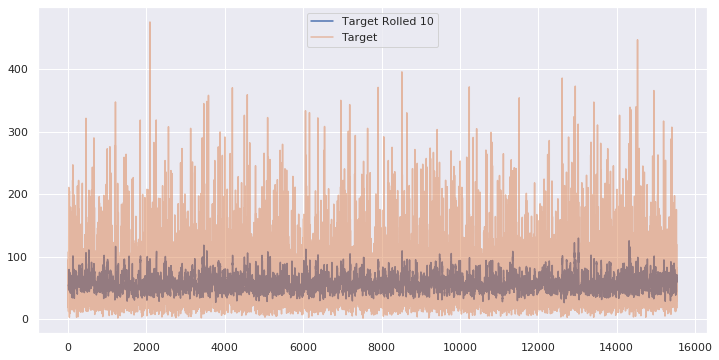

In [38]:
target.rolling(10).mean().plot(label='Target Rolled 10')
target.plot(alpha=0.5, label='Target')

plt.legend()
plt.plot()

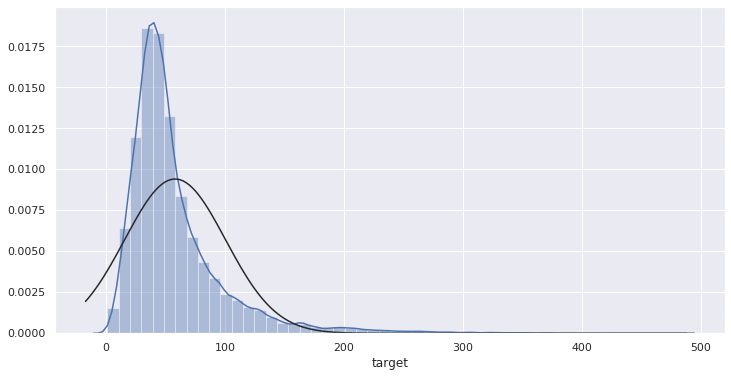

In [206]:
sn.distplot(train.target, fit=norm)

## Missing Value Analysis

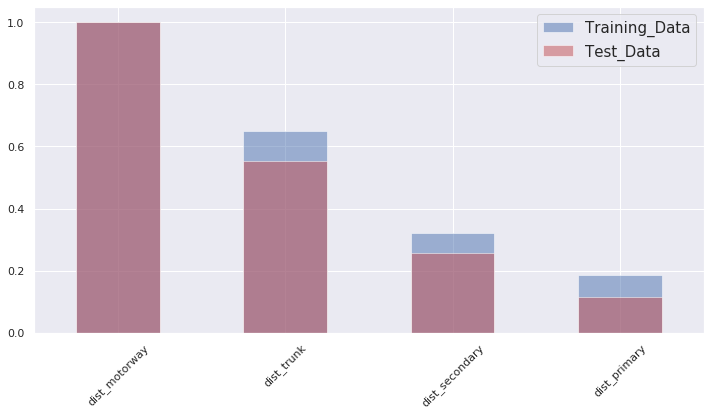

In [91]:
nan_analysis(train, test)

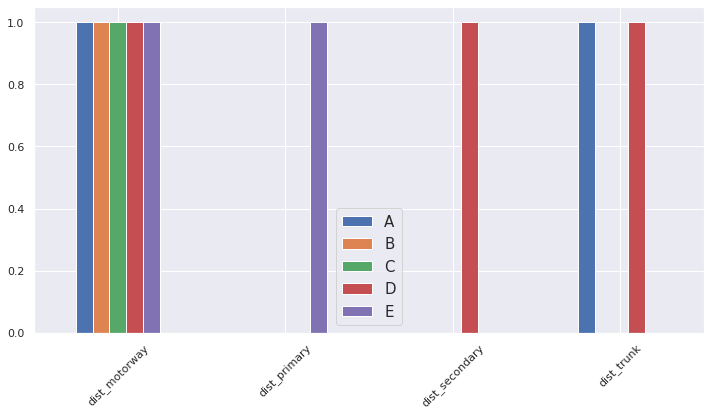

In [119]:
location_nan(train)

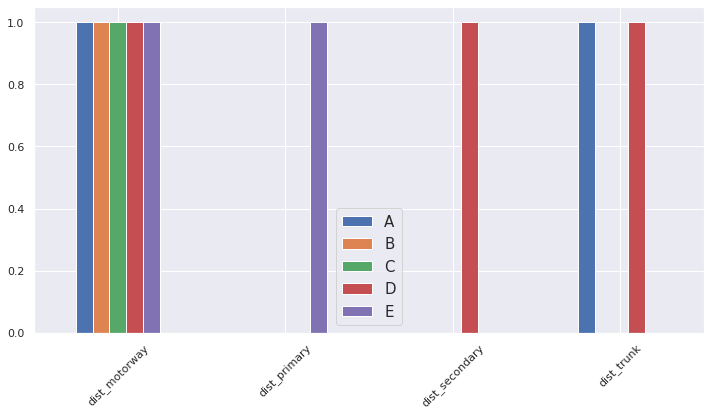

In [120]:
location_nan(test)

In [12]:
# ANALYSIS --> DROPPING 'DIST_MOTORWAY'

train = train.drop('dist_motorway', axis=1)
valid = valid.drop('dist_motorway', axis=1)
test = test.drop('dist_motorway', axis=1)

In [13]:
train.dist_trunk.value_counts()

850.423131    2907
32.885520     1753
528.078476     767
Name: dist_trunk, dtype: int64

In [14]:
# ANALYSIS --> DROPPING 'DIST_TRUNK'

train = train.drop('dist_trunk', axis=1)
valid = valid.drop('dist_trunk', axis=1)
test = test.drop('dist_trunk', axis=1)

In [15]:
train.dist_secondary.value_counts()

343.595039     5122
1738.872942    2907
12.730489      1753
1144.376412     767
Name: dist_secondary, dtype: int64

In [16]:
# ANALYSIS --> DROPPING 'DIST_SECONDARY' AND 'DIST_PRIMARY'

train = train.drop('dist_secondary', axis=1)
valid = valid.drop('dist_secondary', axis=1)
test = test.drop('dist_secondary', axis=1)

train = train.drop('dist_primary', axis=1)
valid = valid.drop('dist_primary', axis=1)
test = test.drop('dist_primary', axis=1)

IndexError: index 0 is out of bounds for axis 0 with size 0

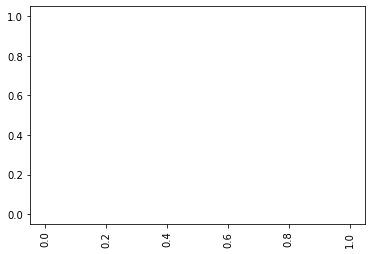

In [17]:
nan_analysis(train)

## Informative Analysis

In [18]:
train.describe()

target      max_temp      min_temp     mean_temp      std_temp  \
count  15539.000000  15539.000000  15539.000000  15539.000000  15539.000000   
mean      58.242429     29.547838     17.559058     22.770055      3.243253   
std       42.373700      2.154860      1.068280      1.316935      0.686768   
min        1.452619     19.733333     13.783333     18.592222      0.554706   
25%       33.482625     27.872727     16.850000     21.655591      2.760365   
50%       46.504048     29.483333     17.525000     22.768363      3.193059   
75%       68.569062     30.950000     18.300000     23.705406      3.719111   
max      475.820000     36.533333     20.600000     27.549449      5.704088   

           var_temp   median_temp      ptp_temp    max_precip  min_precip  \
count  15539.000000  15539.000000  15539.000000  15539.000000     15539.0   
mean      10.990308     22.069332     11.988780      8.124196         0.0   
std        4.576294      1.422231      2.384846      9.223218         0.0   
min        0.307698     18.541667      2.133333      0.000000         0.0   
25%        7.619616     20.858333     10.250000      0.833000         0.0   
50%       10.195628     22.083333     11.633333      5.411000         0.0   
75%       13.831787     23.158333     13.678788     11.625000         0.0   
max       32.536622     26.625000     18.933333     45.833000         0.0   

       ...           km2        aspect  dist_tertiary  dist_unclassified  \
count  ...  15539.000000  15539.000000   15539.000000       15539.000000   
mean   ...      2.407961    145.365384     359.074405         266.625077   
std    ...      2.380447     47.012066     188.457889         153.315494   
min    ...      0.800000     90.000000      72.459340          65.142004   
25%    ...      0.800000     90.000000     137.722087          76.024389   
50%    ...      1.600000    121.000000     339.693908         330.609776   
75%    ...      1.900000    194.000000     575.917422         406.967815   
max    ...      8.500000    219.800000     575.917422         449.591885   

       dist_residential          popn            hh  hh_cook_charcoal  \
count      15539.000000  15539.000000  15539.000000      15539.000000   
mean          89.891771  16000.932492   4036.911062       2764.413476   
std          115.350186  29463.389296   8214.103958       6624.734738   
min            1.042809   3596.000000    663.000000          7.000000   
25%           11.601442   3596.000000    663.000000          7.000000   
50%           11.601442   4763.000000    809.000000        508.000000   
75%          254.307415   6064.000000   1297.000000        985.000000   
max          254.307415  97895.000000  26873.000000      21316.000000   

       hh_cook_firewood  hh_burn_waste  
count      15539.000000   15539.000000  
mean         369.281743    1207.954373  
std          358.740502    3076.767072  
min           26.000000      43.000000  
25%           43.000000      99.000000  
50%           43.000000      99.000000  
75%          651.000000     142.000000  
max         1144.000000    9835.000000  

[8 rows x 54 columns]

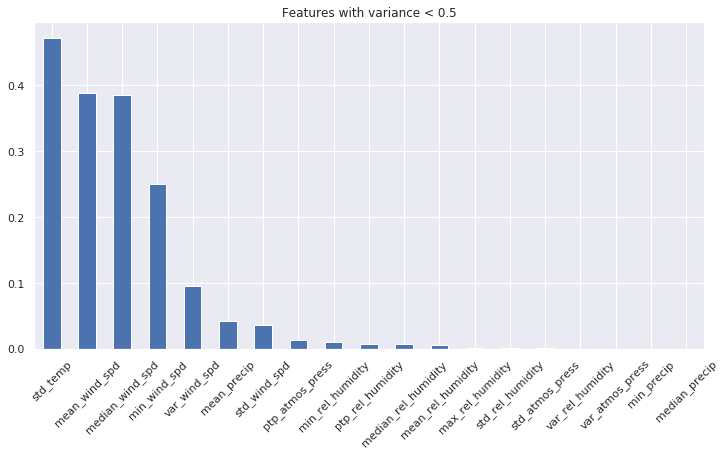

In [95]:
low_var = low_variance_features(train)

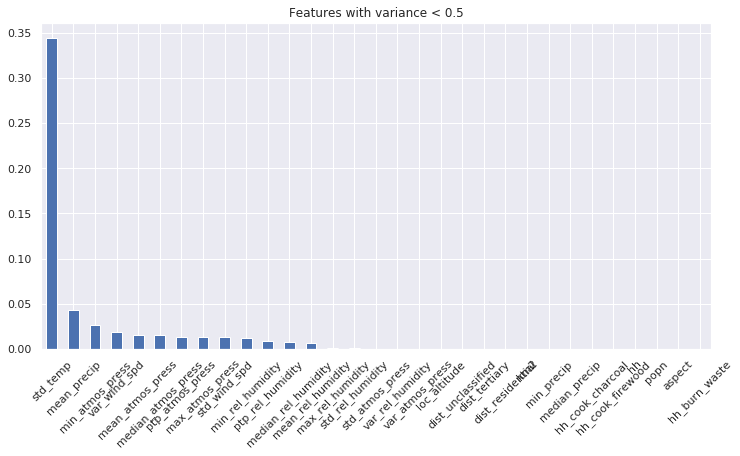

In [65]:
low_var_A = low_variance_features(train_A)

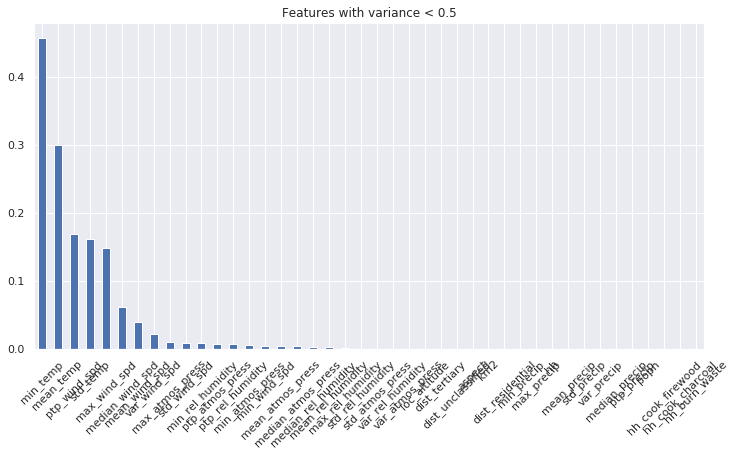

In [66]:
low_var_B = low_variance_features(train_B)

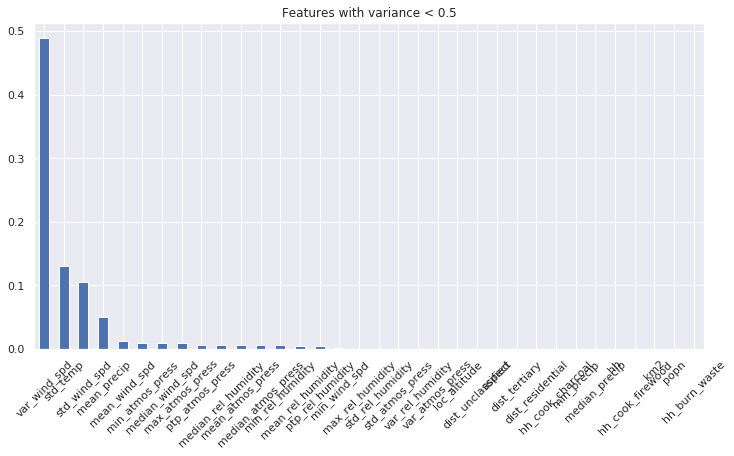

In [67]:
low_var_C = low_variance_features(train_C)

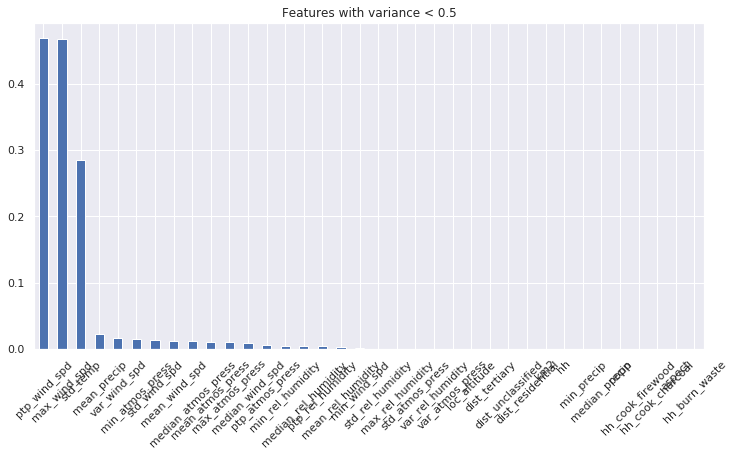

In [68]:
low_var_D = low_variance_features(train_D)

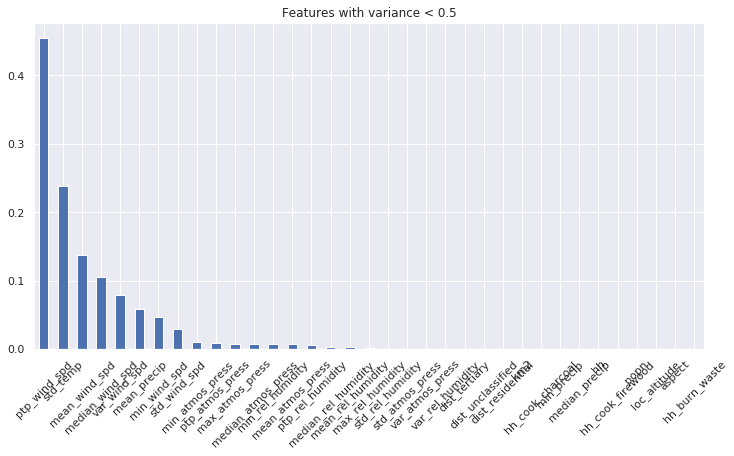

In [69]:
low_var_E = low_variance_features(train_E)

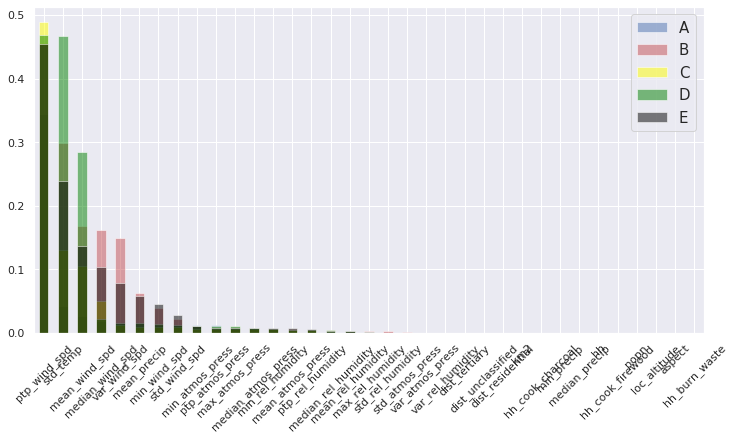

In [63]:
variance_analysis(train)

In [88]:
low_var_A.sort_index()

aspect                 0.000000e+00
dist_residential       1.583585e-25
dist_tertiary          3.227151e-22
dist_unclassified      6.661268e-22
hh                     0.000000e+00
hh_burn_waste          0.000000e+00
hh_cook_charcoal       0.000000e+00
hh_cook_firewood       0.000000e+00
km2                    3.372689e-26
loc_altitude           2.783179e-21
max_atmos_press        1.310530e-02
max_rel_humidity       9.557957e-04
mean_atmos_press       1.553965e-02
mean_precip            4.268077e-02
mean_rel_humidity      6.525402e-03
median_atmos_press     1.501729e-02
median_precip          0.000000e+00
median_rel_humidity    8.066940e-03
min_atmos_press        2.639800e-02
min_precip             0.000000e+00
min_rel_humidity       1.209345e-02
popn                   0.000000e+00
ptp_atmos_press        1.327232e-02
ptp_rel_humidity       9.179339e-03
std_atmos_press        4.469299e-04
std_rel_humidity       6.676007e-04
std_temp               3.436457e-01
std_wind_spd           1.299

In [89]:
low_var_B.sort_index()

aspect                 9.908390e-25
dist_residential       9.557678e-29
dist_tertiary          5.467813e-23
dist_unclassified      1.167977e-24
hh                     0.000000e+00
hh_burn_waste          0.000000e+00
hh_cook_charcoal       0.000000e+00
hh_cook_firewood       0.000000e+00
km2                    3.545820e-27
loc_altitude           2.254939e-22
max_atmos_press        1.049745e-02
max_precip             0.000000e+00
max_rel_humidity       8.514735e-04
max_wind_spd           1.489330e-01
mean_atmos_press       3.959612e-03
mean_precip            0.000000e+00
mean_rel_humidity      2.979946e-03
mean_temp              2.994117e-01
mean_wind_spd          3.927543e-02
median_atmos_press     3.732022e-03
median_precip          0.000000e+00
median_rel_humidity    3.023100e-03
median_wind_spd        6.208525e-02
min_atmos_press        5.621822e-03
min_precip             0.000000e+00
min_rel_humidity       8.711522e-03
min_temp               4.561747e-01
min_wind_spd           4.196

In [90]:
low_var_C.sort_index()

aspect                 3.104991e-23
dist_residential       2.085329e-25
dist_tertiary          1.980426e-24
dist_unclassified      7.274292e-23
hh                     0.000000e+00
hh_burn_waste          0.000000e+00
hh_cook_charcoal       0.000000e+00
hh_cook_firewood       0.000000e+00
km2                    0.000000e+00
loc_altitude           1.072638e-21
max_atmos_press        8.776633e-03
max_rel_humidity       4.595875e-04
mean_atmos_press       6.307592e-03
mean_precip            4.969888e-02
mean_rel_humidity      5.191907e-03
mean_wind_spd          1.254608e-02
median_atmos_press     6.274761e-03
median_precip          0.000000e+00
median_rel_humidity    6.509830e-03
median_wind_spd        9.179357e-03
min_atmos_press        9.425709e-03
min_precip             0.000000e+00
min_rel_humidity       6.199710e-03
min_wind_spd           1.393408e-03
popn                   0.000000e+00
ptp_atmos_press        6.969040e-03
ptp_rel_humidity       4.450616e-03
std_atmos_press        2.361

In [91]:
low_var_D.sort_index()

aspect                 0.000000e+00
dist_residential       1.240745e-24
dist_tertiary          1.493910e-22
dist_unclassified      4.200076e-23
hh                     0.000000e+00
hh_burn_waste          0.000000e+00
hh_cook_charcoal       0.000000e+00
hh_cook_firewood       0.000000e+00
km2                    5.192744e-27
loc_altitude           8.523530e-21
max_atmos_press        1.031667e-02
max_rel_humidity       5.709357e-04
max_wind_spd           4.670624e-01
mean_atmos_press       1.107243e-02
mean_precip            2.248274e-02
mean_rel_humidity      3.376752e-03
mean_wind_spd          1.210269e-02
median_atmos_press     1.148243e-02
median_precip          0.000000e+00
median_rel_humidity    4.574481e-03
median_wind_spd        8.465185e-03
min_atmos_press        1.488312e-02
min_precip             0.000000e+00
min_rel_humidity       5.003346e-03
min_wind_spd           1.696962e-03
popn                   0.000000e+00
ptp_atmos_press        6.561680e-03
ptp_rel_humidity       4.042

In [92]:
low_var_E.sort_index()

aspect                 0.000000e+00
dist_residential       1.303035e-26
dist_tertiary          3.666140e-23
dist_unclassified      2.017270e-23
hh                     0.000000e+00
hh_burn_waste          0.000000e+00
hh_cook_charcoal       0.000000e+00
hh_cook_firewood       0.000000e+00
km2                    1.775548e-28
loc_altitude           0.000000e+00
max_atmos_press        7.821377e-03
max_rel_humidity       1.069048e-03
mean_atmos_press       7.007938e-03
mean_precip            5.801228e-02
mean_rel_humidity      2.448427e-03
mean_wind_spd          1.368939e-01
median_atmos_press     7.598203e-03
median_precip          0.000000e+00
median_rel_humidity    2.800652e-03
median_wind_spd        1.044742e-01
min_atmos_press        1.066068e-02
min_precip             0.000000e+00
min_rel_humidity       7.149927e-03
min_wind_spd           4.619637e-02
popn                   0.000000e+00
ptp_atmos_press        8.463034e-03
ptp_rel_humidity       5.578847e-03
ptp_wind_spd           4.540

In [120]:
low_var.sort_values()

median_precip          0.000000
min_precip             0.000000
var_atmos_press        0.000042
var_rel_humidity       0.000053
std_atmos_press        0.000446
std_rel_humidity       0.000787
max_rel_humidity       0.000988
mean_rel_humidity      0.005075
median_rel_humidity    0.006415
ptp_rel_humidity       0.007427
min_rel_humidity       0.009366
ptp_atmos_press        0.012435
std_wind_spd           0.035290
mean_precip            0.041579
var_wind_spd           0.094870
min_wind_spd           0.249469
median_wind_spd        0.385172
mean_wind_spd          0.387717
std_temp               0.471650
dtype: float64

In [121]:
LOW_VARIANCE_COLS = ['median_precip', 'min_precip',
                     'max_rel_humidity', 'mean_rel_humidity', 'var_atmos_press',
                     'var_rel_humidity', 'ptp_rel_humidity', 'std_rel_humidity',
                     'std_atmos_press']

In [108]:
train.aspect.describe()

count    15539.000000
mean       145.365384
std         47.012066
min         90.000000
25%         90.000000
50%        121.000000
75%        194.000000
max        219.800000
Name: aspect, dtype: float64

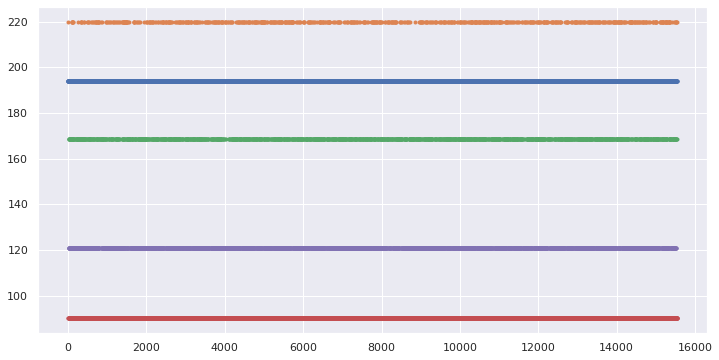

In [112]:
train_A.aspect.plot(style='.')
train_B.aspect.plot(style='.')
train_C.aspect.plot(style='.')
train_D.aspect.plot(style='.')
train_E.aspect.plot(style='.')

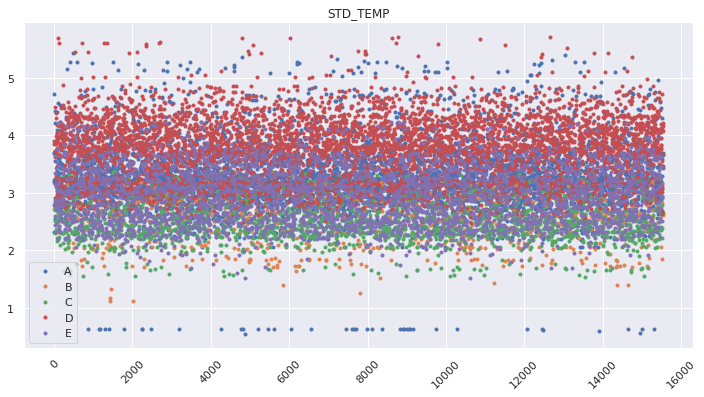

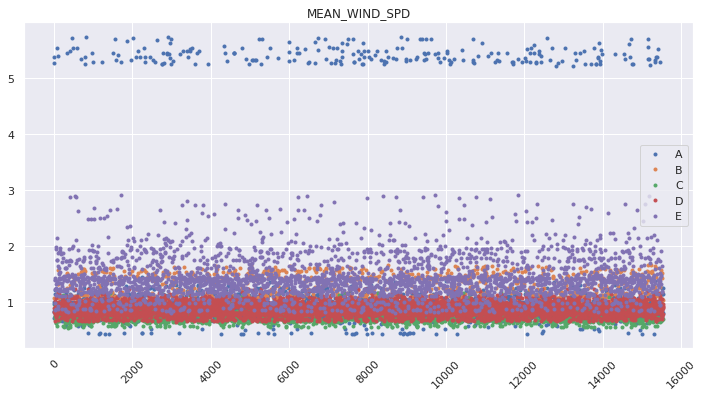

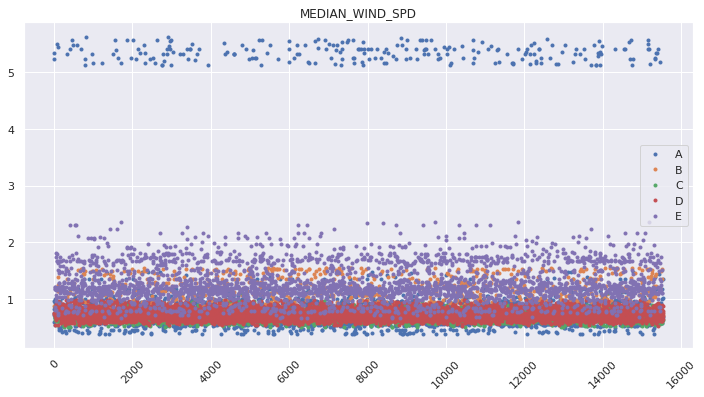

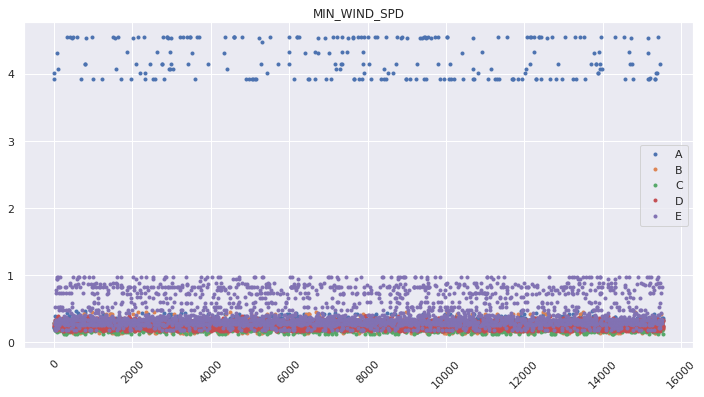

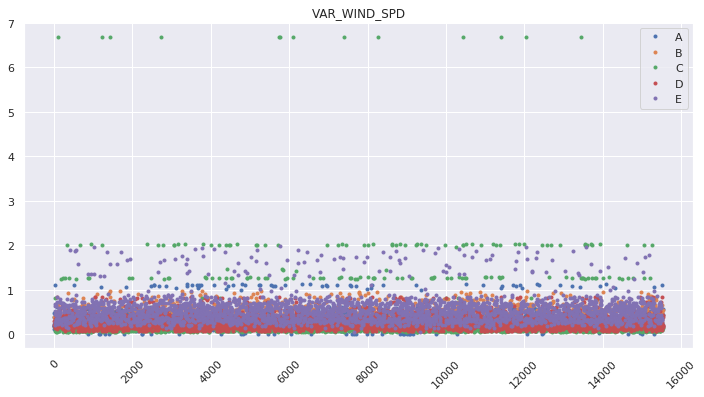

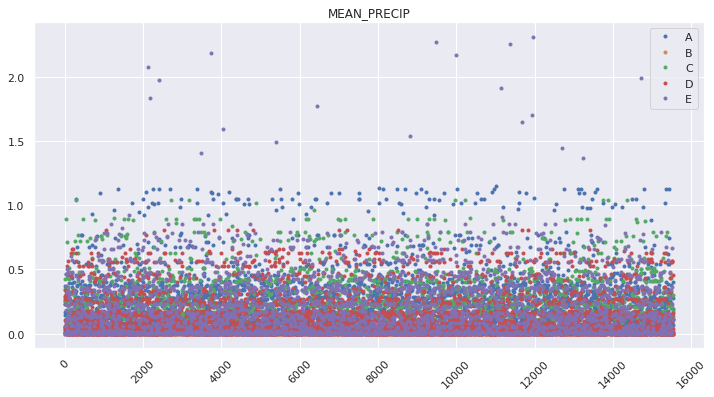

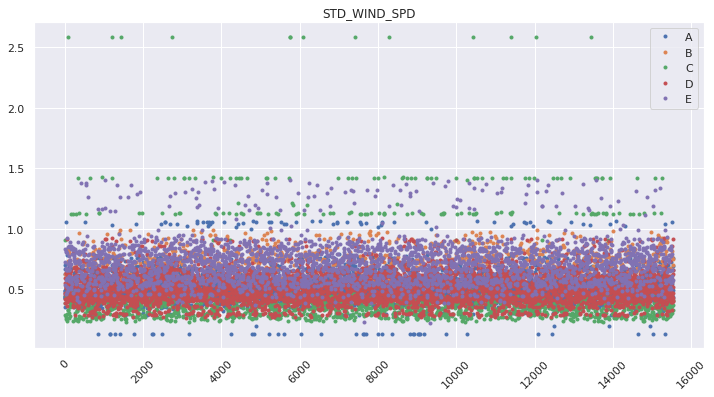

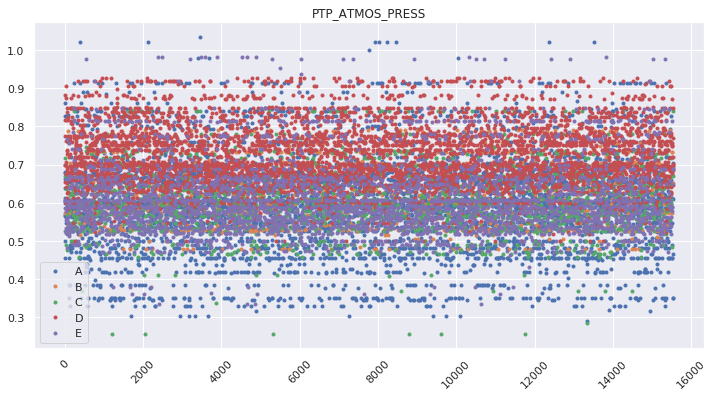

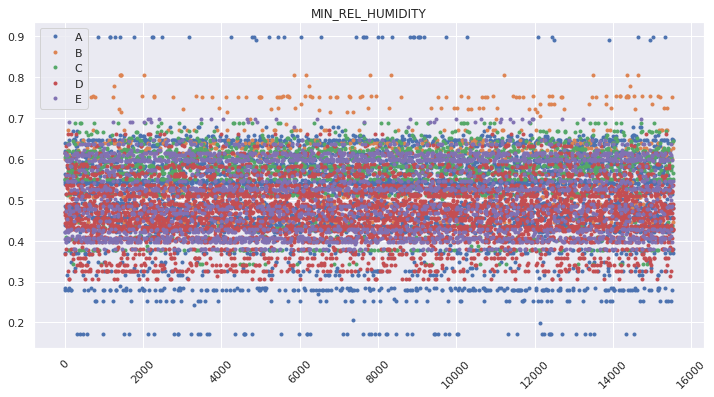

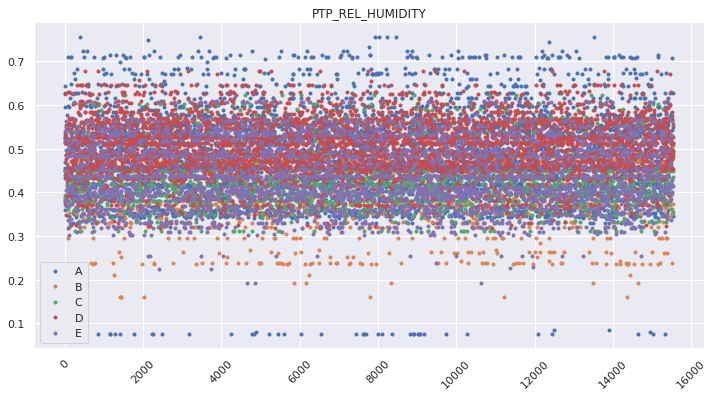

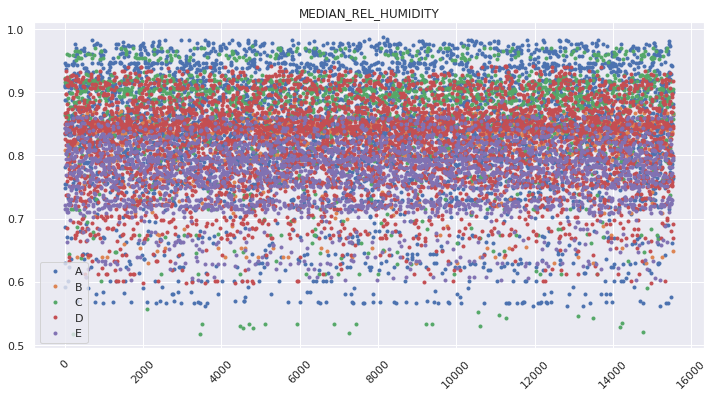

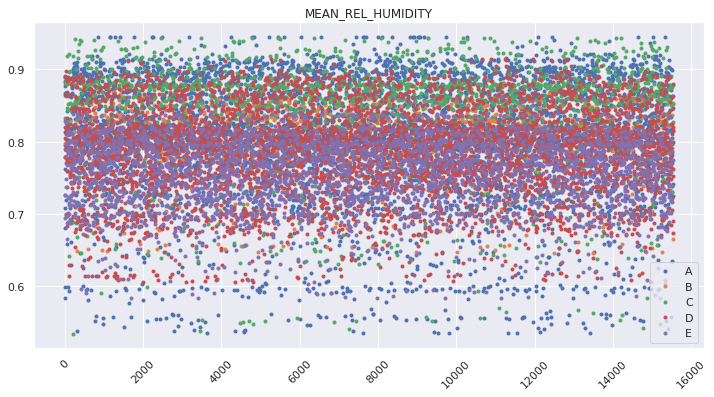

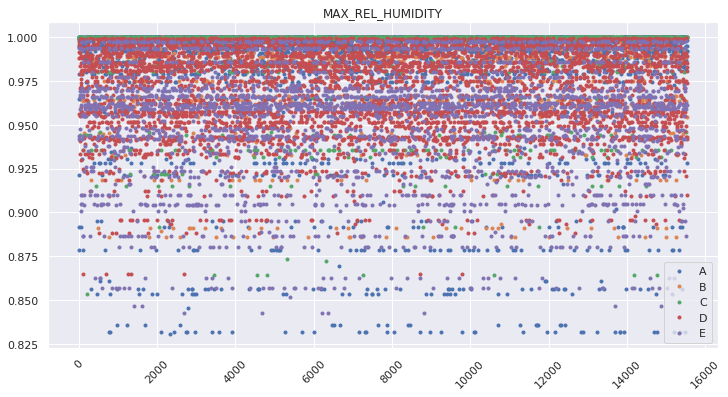

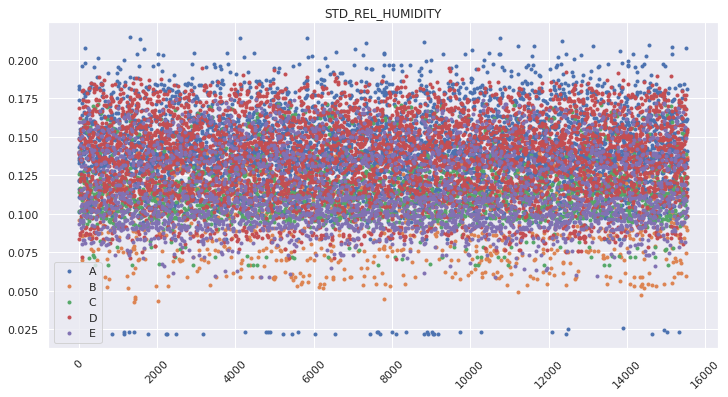

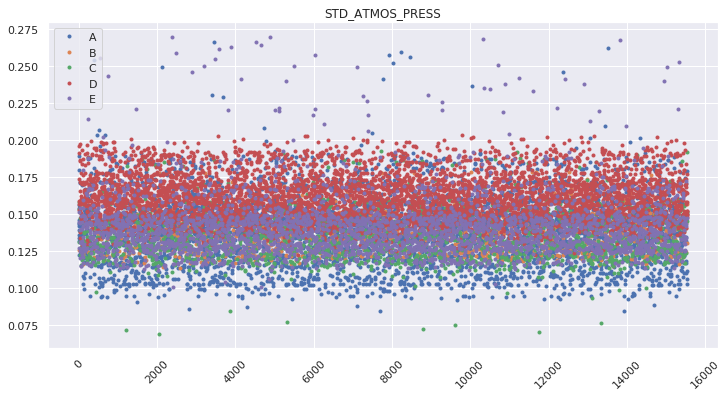

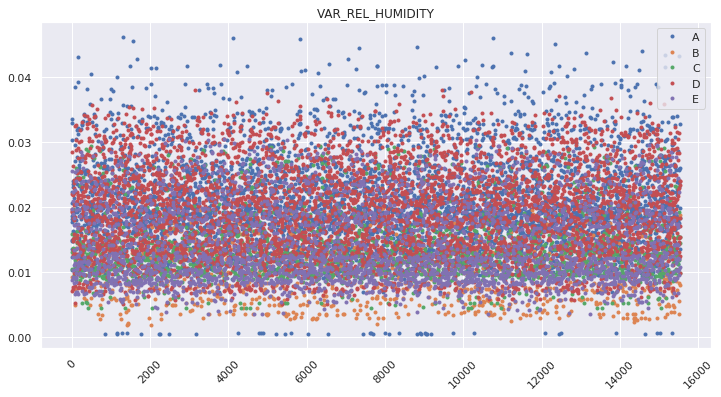

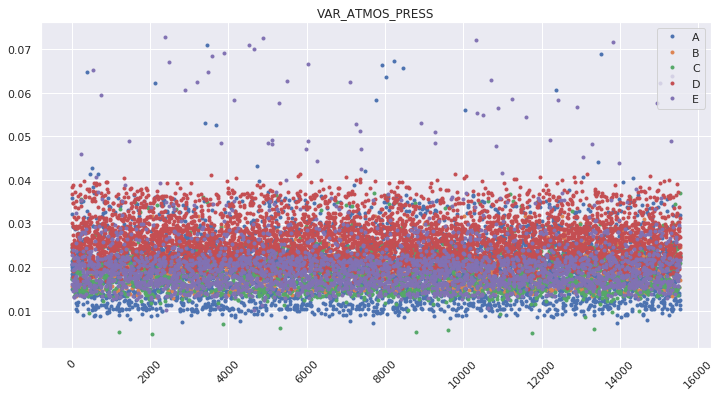

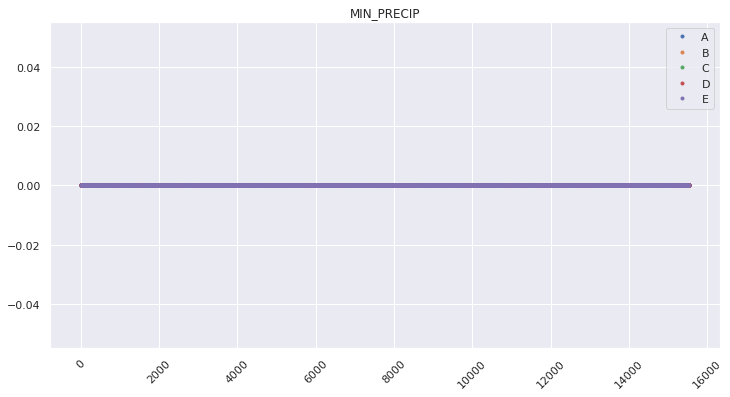

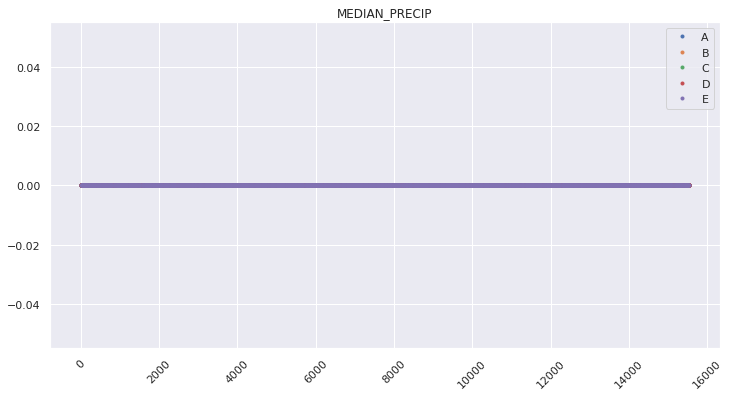

In [118]:
scatter_analysis(train, low_var.index)

In [119]:
train

ID location      target   max_temp   min_temp  mean_temp  \
0       ID_train_2339        A   36.596585  27.308333  18.708333  22.494749   
1       ID_train_6957        B   38.702195  28.008333  17.945455  22.617268   
2       ID_train_6860        A   60.076744  32.175000  17.308333  23.564200   
3      ID_train_15324        D   33.028043  32.475000  17.241667  23.736364   
4        ID_train_951        A   14.172444  30.016667  18.158333  22.723372   
...               ...      ...         ...        ...        ...        ...   
15534  ID_train_15030        C   33.803556  27.258333  17.325000  21.785199   
15535   ID_train_6540        D  109.275217  32.533333  17.758333  24.161915   
15536  ID_train_13182        D   73.544651  31.025000  17.266667  23.562879   
15537   ID_train_9840        D   50.410000  30.725000  16.325000  22.107851   
15538  ID_train_14248        A   17.974545  26.408333  17.275000  21.241667   

       std_temp   var_temp  median_temp   ptp_temp  ...  km2  aspect  \
0      2.788876   7.777827    21.833333   8.600000  ...  1.9   194.0   
1      2.714877   7.370555    21.750000  10.062879  ...  5.4   219.8   
2      3.699033  13.682844    22.908333  14.866667  ...  1.9   194.0   
3      3.906744  15.262650    22.241667  15.233333  ...  0.8    90.0   
4      3.218939  10.361571    21.450000  11.858333  ...  1.9   194.0   
...         ...        ...          ...        ...  ...  ...     ...   
15534  2.644531   6.993545    21.325000   9.933333  ...  8.5   168.7   
15535  4.169487  17.384620    23.191667  14.775000  ...  0.8    90.0   
15536  3.668514  13.457998    23.091667  13.758333  ...  0.8    90.0   
15537  3.458674  11.962428    21.500000  14.400000  ...  0.8    90.0   
15538  3.664300  13.427094    18.825000   9.133333  ...  1.9   194.0   

       dist_tertiary  dist_unclassified  dist_residential   popn     hh  \
0         575.917422         330.609776        254.307415   4763    809   
1         531.103271          65.142004          1.042809  22243   5735   
2         575.917422         330.609776        254.307415   4763    809   
3         339.693908          76.024389         11.601442   3596    663   
4         575.917422         330.609776        254.307415   4763    809   
...              ...                ...               ...    ...    ...   
15534      72.459340         406.967815         13.931350  97895  26873   
15535     339.693908          76.024389         11.601442   3596    663   
15536     339.693908          76.024389         11.601442   3596    663   
15537     339.693908          76.024389         11.601442   3596    663   
15538     575.917422         330.609776        254.307415   4763    809   

       hh_cook_charcoal  hh_cook_firewood  hh_burn_waste  
0                   508                43            142  
1                   116              1144            239  
2                   508                43            142  
3                     7               651             99  
4                   508                43            142  
...                 ...               ...            ...  
15534             21316               751           9835  
15535                 7               651             99  
15536                 7               651             99  
15537                 7               651             99  
15538               508                43            142  

[15539 rows x 56 columns]

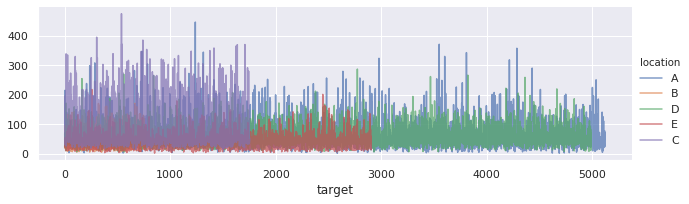

In [153]:
trend_analysys(data, 'target')

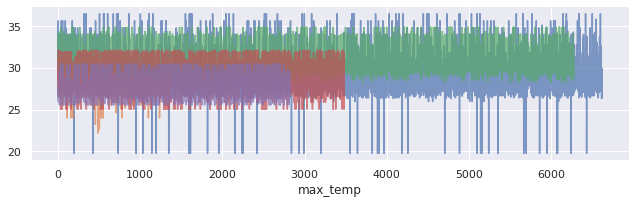

In [151]:
trend_analysys(data, 'max_temp')

## Categorical Analysis

In [122]:
cat_cols = train.select_dtypes(['object']).columns
cat_cols

Index(['ID', 'location'], dtype='object')

In [182]:
train = data[data.target.notnull()].reset_index(drop=True)
valid = data[data.target.isna()].reset_index(drop=True)

In [183]:
all_data = train.append(valid).append(test)

In [184]:
all_data.ID

0           ID_train_0
1       ID_train_10001
2       ID_train_10007
3       ID_train_10015
4       ID_train_10030
             ...      
5030       ID_test_969
5031       ID_test_980
5032       ID_test_983
5033       ID_test_986
5034       ID_test_989
Name: ID, Length: 25609, dtype: object

In [185]:
encoded_id, uniques_id = pd.factorize(all_data.ID)

In [186]:
encoded_id.shape

(25609,)

In [187]:
train_size, valid_size, test_size = train.shape[0], valid.shape[0], test.shape[0]
train_size, valid_size, test_size

(15539, 5035, 5035)

In [189]:
train.ID = encoded_id[:train_size]
valid.ID = encoded_id[train_size : train_size + valid_size] 
test.ID = encoded_id[valid_size : valid_size + test_size] 

In [159]:
train

ID location      target   max_temp   min_temp  mean_temp  std_temp  \
0          0        C   45.126304  27.208333  19.275000  22.299527  2.594011   
1          1        C   53.100000  29.266667  19.116667  23.638430  2.785974   
2          2        C   23.215250  26.600000  17.250000  20.946970  2.626110   
3          3        C   37.308333  29.266667  17.983333  23.648554  2.912698   
4          4        C   61.786522  27.300000  17.875000  20.871901  2.010689   
...      ...      ...         ...        ...        ...        ...       ...   
15534  15534        B   45.900732  27.781818  17.908333  22.322220  2.437575   
15535  15535        B   42.629762  27.900000  20.366667  24.178375  2.059888   
15536  15536        B  108.219024  27.416667  18.791667  23.090058  2.614562   
15537  15537        B   50.928837  27.781818  17.908333  22.396137  2.469298   
15538  15538        B   33.557619  29.158333  19.300000  23.463361  2.518757   

       var_temp  median_temp   ptp_temp  ...  dist_primary  dist_secondary  \
0      6.728895    21.358333   7.933333  ...   4794.704552       12.730489   
1      7.761652    22.925000  10.150000  ...   4794.704552       12.730489   
2      6.896452    20.100000   9.350000  ...   4794.704552       12.730489   
3      8.483812    23.250000  11.283333  ...   4794.704552       12.730489   
4      4.042869    20.175000   9.425000  ...   4794.704552       12.730489   
...         ...          ...        ...  ...           ...             ...   
15534  5.941771    21.641667   9.873485  ...   2172.680462     1144.376412   
15535  4.243138    24.208333   7.533333  ...   2172.680462     1144.376412   
15536  6.835933    22.762500   8.625000  ...   2172.680462     1144.376412   
15537  6.097431    21.700000   9.873485  ...   2172.680462     1144.376412   
15538  6.344139    23.125000   9.858333  ...   2172.680462     1144.376412   

       dist_tertiary  dist_unclassified  dist_residential   popn     hh  \
0          72.459340         406.967815         13.931350  97895  26873   
1          72.459340         406.967815         13.931350  97895  26873   
2          72.459340         406.967815         13.931350  97895  26873   
3          72.459340         406.967815         13.931350  97895  26873   
4          72.459340         406.967815         13.931350  97895  26873   
...              ...                ...               ...    ...    ...   
15534     531.103271          65.142004          1.042809  22243   5735   
15535     531.103271          65.142004          1.042809  22243   5735   
15536     531.103271          65.142004          1.042809  22243   5735   
15537     531.103271          65.142004          1.042809  22243   5735   
15538     531.103271          65.142004          1.042809  22243   5735   

       hh_cook_charcoal  hh_cook_firewood  hh_burn_waste  
0                 21316               751           9835  
1                 21316               751           9835  
2                 21316               751           9835  
3                 21316               751           9835  
4                 21316               751           9835  
...                 ...               ...            ...  
15534               116              1144            239  
15535               116              1144            239  
15536               116              1144            239  
15537               116              1144            239  
15538               116              1144            239  

[15539 rows x 60 columns]

In [160]:
valid

ID location  target   max_temp   min_temp  mean_temp  std_temp  \
0     15539        C     NaN  26.858333  17.050000  21.389532  2.731833   
1     15540        C     NaN  26.991667  17.275000  21.302824  2.289268   
2     15541        C     NaN  27.325000  18.633333  22.361639  2.480003   
3     15542        C     NaN  28.633333  16.816667  21.568182  3.070717   
4     15543        C     NaN  27.383333  17.550000  21.118132  2.323060   
...     ...      ...     ...        ...        ...        ...       ...   
5030  20569        B     NaN  27.150000  18.933333  23.258214  2.366628   
5031  20570        B     NaN  27.908333  18.675000  23.750795  2.309491   
5032  20571        B     NaN  27.141667  19.725000  22.558621  2.168109   
5033  20572        B     NaN  27.150000  19.790909  23.043201  2.163094   
5034  20573        B     NaN  29.158333  18.791667  23.452066  2.836542   

      var_temp  median_temp   ptp_temp  ...  dist_primary  dist_secondary  \
0     7.462909    20.908333   9.808333  ...   4794.704552       12.730489   
1     5.240748    20.716667   9.716667  ...   4794.704552       12.730489   
2     6.150415    21.616667   8.691667  ...   4794.704552       12.730489   
3     9.429304    20.575000  11.816667  ...   4794.704552       12.730489   
4     5.396606    20.708333   9.833333  ...   4794.704552       12.730489   
...        ...          ...        ...  ...           ...             ...   
5030  5.600926    22.891667   8.216667  ...   2172.680462     1144.376412   
5031  5.333750    23.883333   9.233333  ...   2172.680462     1144.376412   
5032  4.700695    21.981818   7.416667  ...   2172.680462     1144.376412   
5033  4.678978    22.591667   7.359091  ...   2172.680462     1144.376412   
5034  8.045968    22.791667  10.366667  ...   2172.680462     1144.376412   

      dist_tertiary  dist_unclassified  dist_residential   popn     hh  \
0         72.459340         406.967815         13.931350  97895  26873   
1         72.459340         406.967815         13.931350  97895  26873   
2         72.459340         406.967815         13.931350  97895  26873   
3         72.459340         406.967815         13.931350  97895  26873   
4         72.459340         406.967815         13.931350  97895  26873   
...             ...                ...               ...    ...    ...   
5030     531.103271          65.142004          1.042809  22243   5735   
5031     531.103271          65.142004          1.042809  22243   5735   
5032     531.103271          65.142004          1.042809  22243   5735   
5033     531.103271          65.142004          1.042809  22243   5735   
5034     531.103271          65.142004          1.042809  22243   5735   

      hh_cook_charcoal  hh_cook_firewood  hh_burn_waste  
0                21316               751           9835  
1                21316               751           9835  
2                21316               751           9835  
3                21316               751           9835  
4                21316               751           9835  
...                ...               ...            ...  
5030               116              1144            239  
5031               116              1144            239  
5032               116              1144            239  
5033               116              1144            239  
5034               116              1144            239  

[5035 rows x 60 columns]

In [161]:
test

ID location   max_temp   min_temp  mean_temp  std_temp  var_temp  \
0      5035        C  26.858333  17.050000  21.389532  2.731833  7.462909   
1      5036        C  26.991667  17.275000  21.302824  2.289268  5.240748   
2      5037        C  27.325000  18.633333  22.361639  2.480003  6.150415   
3      5038        C  28.633333  16.816667  21.568182  3.070717  9.429304   
4      5039        C  27.383333  17.550000  21.118132  2.323060  5.396606   
...     ...      ...        ...        ...        ...       ...       ...   
5030  10065        B  27.150000  18.933333  23.258214  2.366628  5.600926   
5031  10066        B  27.908333  18.675000  23.750795  2.309491  5.333750   
5032  10067        B  27.141667  19.725000  22.558621  2.168109  4.700695   
5033  10068        B  27.150000  19.790909  23.043201  2.163094  4.678978   
5034  10069        B  29.158333  18.791667  23.452066  2.836542  8.045968   

      median_temp   ptp_temp  max_precip  ...  dist_primary  dist_secondary  \
0       20.908333   9.808333       5.728  ...   4794.704552       12.730489   
1       20.716667   9.716667      15.831  ...   4794.704552       12.730489   
2       21.616667   8.691667       3.604  ...   4794.704552       12.730489   
3       20.575000  11.816667      32.443  ...   4794.704552       12.730489   
4       20.708333   9.833333      11.640  ...   4794.704552       12.730489   
...           ...        ...         ...  ...           ...             ...   
5030    22.891667   8.216667       0.000  ...   2172.680462     1144.376412   
5031    23.883333   9.233333       0.000  ...   2172.680462     1144.376412   
5032    21.981818   7.416667       0.000  ...   2172.680462     1144.376412   
5033    22.591667   7.359091       0.000  ...   2172.680462     1144.376412   
5034    22.791667  10.366667       0.000  ...   2172.680462     1144.376412   

      dist_tertiary  dist_unclassified  dist_residential   popn     hh  \
0         72.459340         406.967815         13.931350  97895  26873   
1         72.459340         406.967815         13.931350  97895  26873   
2         72.459340         406.967815         13.931350  97895  26873   
3         72.459340         406.967815         13.931350  97895  26873   
4         72.459340         406.967815         13.931350  97895  26873   
...             ...                ...               ...    ...    ...   
5030     531.103271          65.142004          1.042809  22243   5735   
5031     531.103271          65.142004          1.042809  22243   5735   
5032     531.103271          65.142004          1.042809  22243   5735   
5033     531.103271          65.142004          1.042809  22243   5735   
5034     531.103271          65.142004          1.042809  22243   5735   

      hh_cook_charcoal  hh_cook_firewood  hh_burn_waste  
0                21316               751           9835  
1                21316               751           9835  
2                21316               751           9835  
3                21316               751           9835  
4                21316               751           9835  
...                ...               ...            ...  
5030               116              1144            239  
5031               116              1144            239  
5032               116              1144            239  
5033               116              1144            239  
5034               116              1144            239  

[5035 rows x 59 columns]

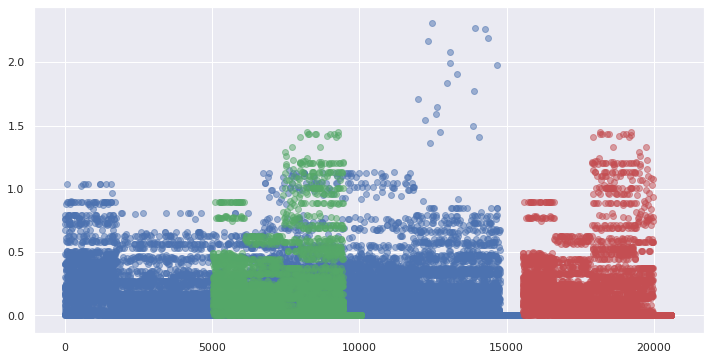

In [170]:
plt.scatter(train.ID, train.mean_precip, c='b', alpha=0.5)
plt.scatter(valid.ID, valid.mean_precip, c='r', alpha=0.5)
plt.scatter(test.ID, test.mean_precip, c='g', alpha=0.5)

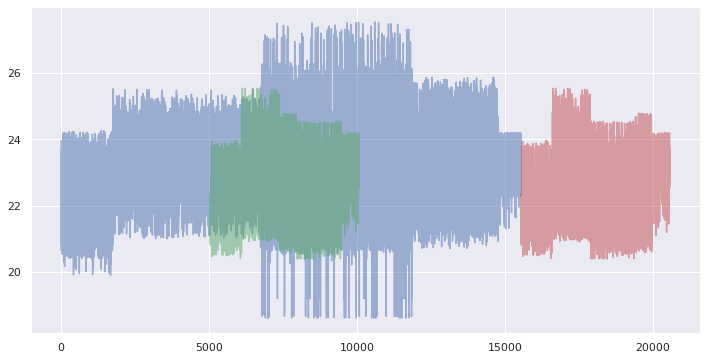

In [172]:
plt.plot(train.ID, train.mean_temp, c='b', alpha=0.5)
plt.plot(valid.ID, valid.mean_temp, c='r', alpha=0.5)
plt.plot(test.ID, test.mean_temp, c='g', alpha=0.5)

In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:
le = LabelEncoder().fit(all_data.location)

In [192]:
train.location = le.transform(train.location)
valid.location = le.transform(valid.location)
test.location = le.transform(test.location)

## Outilier Analysis

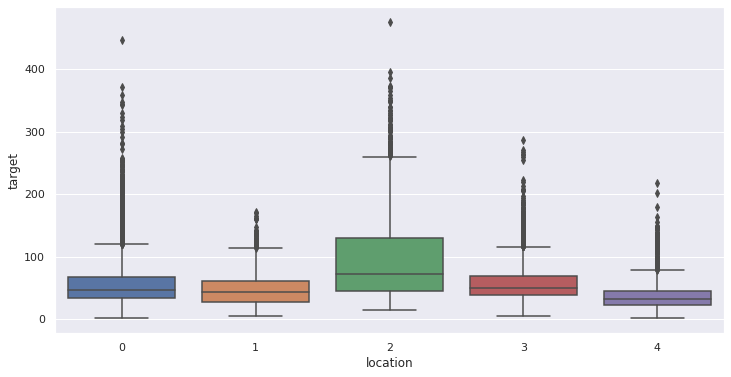

In [200]:
sn.boxplot(x='location', y='target', data=train)

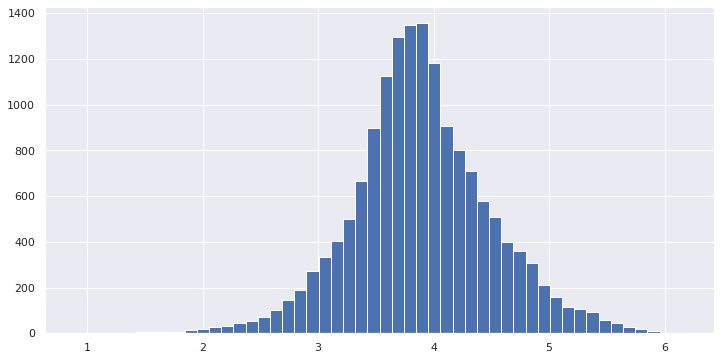

In [215]:
(train.target).hist(bins=50)

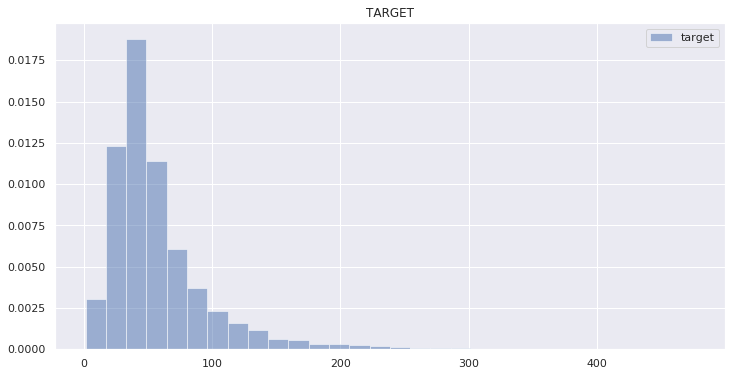

In [225]:
histogram_analysis(train, ['target'])

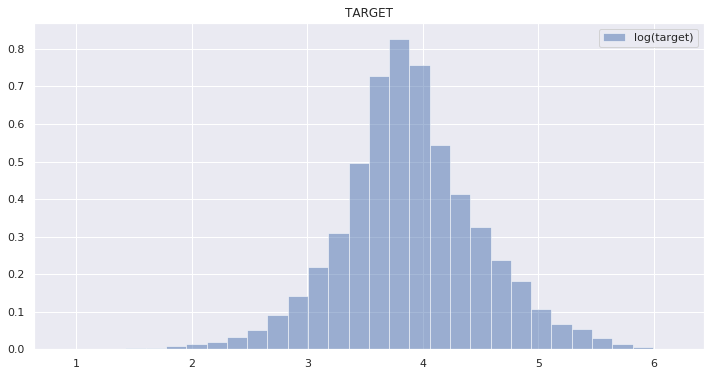

In [226]:
histogram_analysis(train, ['target'], log=True)

In [228]:
df_skew = train.skew().sort_values(ascending=False)

var_wind_spd           8.852821
min_wind_spd           7.304380
ptp_wind_spd           6.227722
median_wind_spd        5.628371
min_wind_dir           5.477179
mean_wind_spd          5.395846
max_wind_spd           5.261925
var_precip             2.967458
target                 2.623971
hh_burn_waste          2.446950
hh_cook_charcoal       2.434912
hh                     2.375755
popn                   2.374017
mean_precip            2.277462
std_wind_spd           2.218895
km2                    1.879798
ptp_precip             1.529607
max_precip             1.529607
std_precip             1.398199
var_temp               0.794423
dist_residential       0.721819
var_wind_dir           0.647671
max_atmos_press        0.647284
mean_atmos_press       0.635618
median_atmos_press     0.633725
min_atmos_press        0.625060
hh_cook_firewood       0.376699
mean_temp              0.310921
max_temp               0.192384
median_temp            0.149875
std_temp               0.143835
ptp_atmo

In [232]:
threshold = 2
skew_feat = df_skew[abs(df_skew) > threshold].index

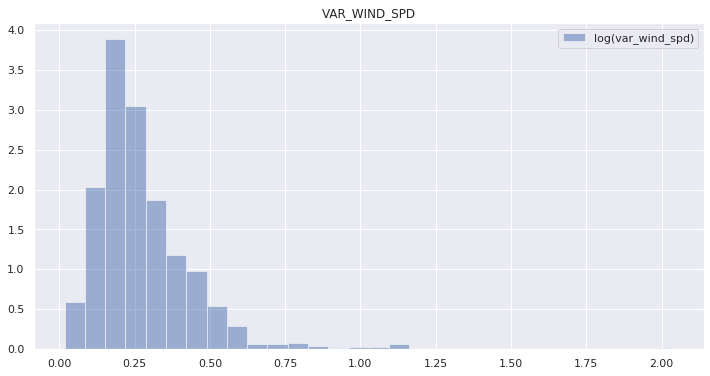

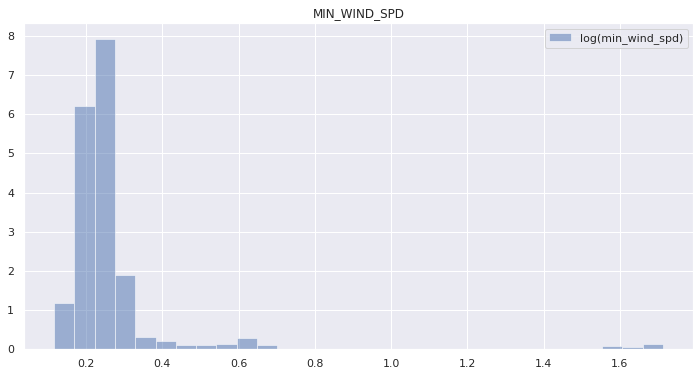

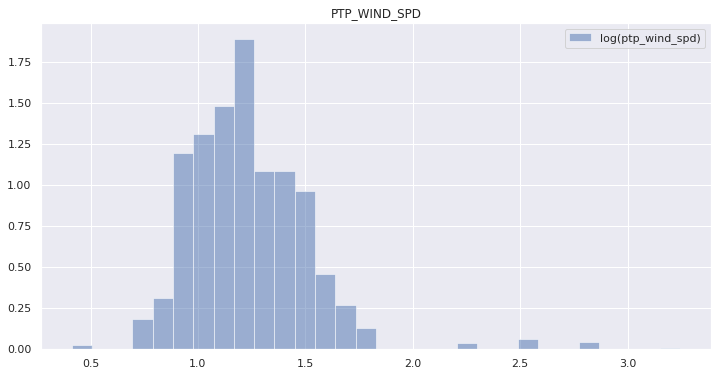

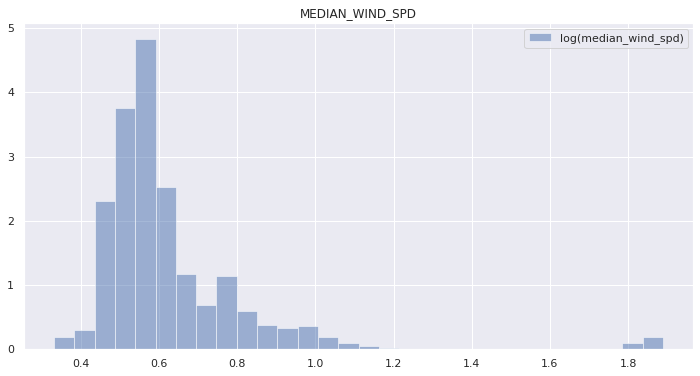

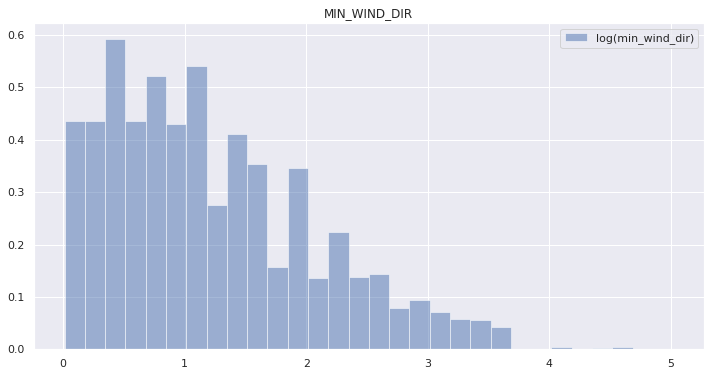

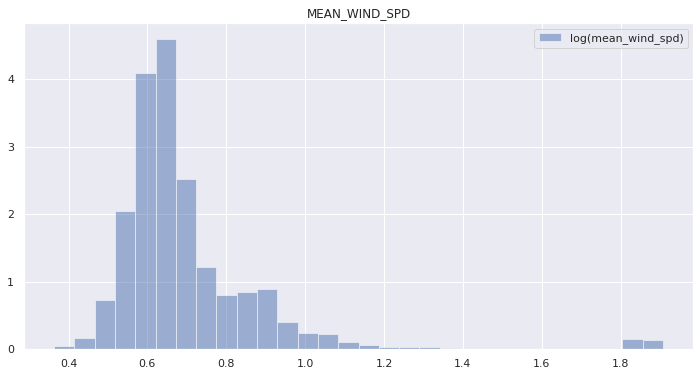

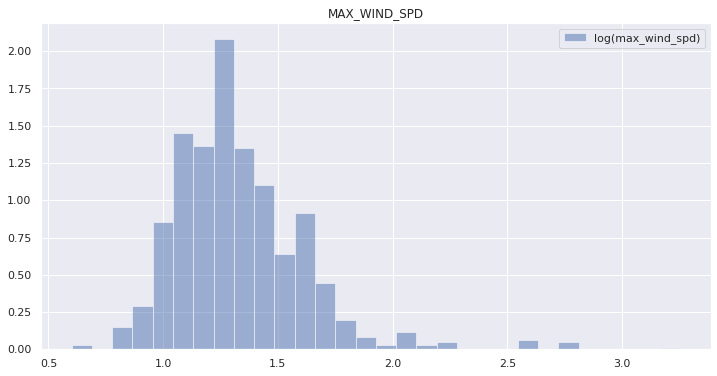

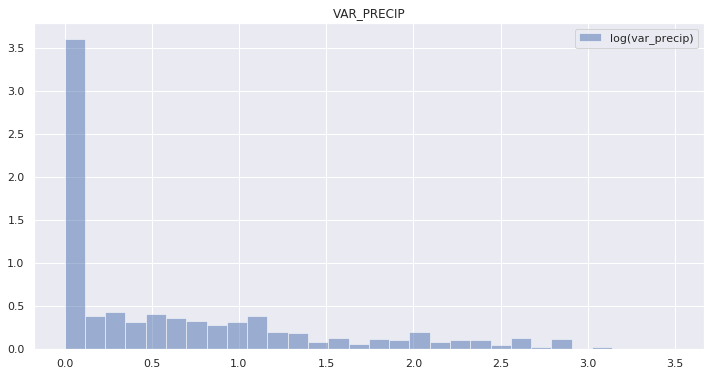

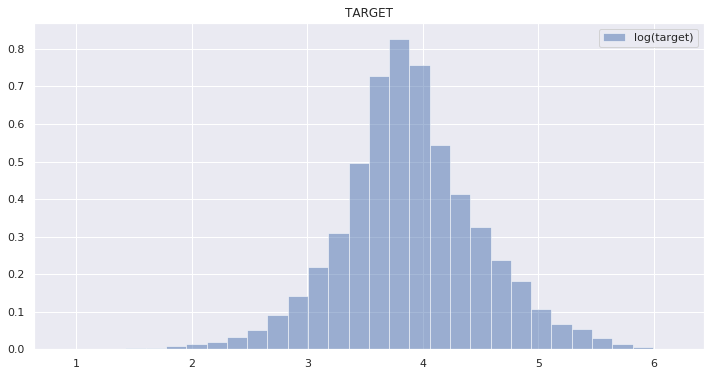

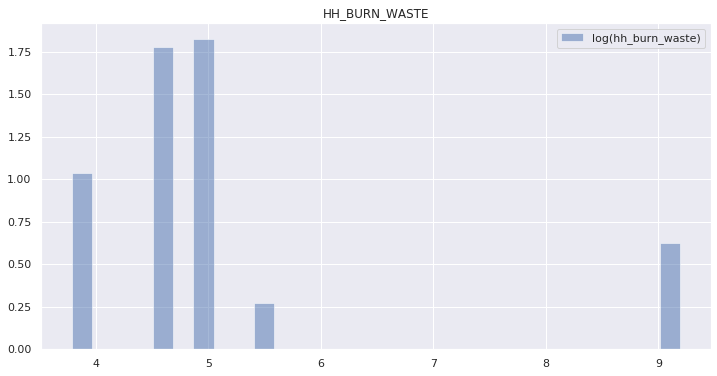

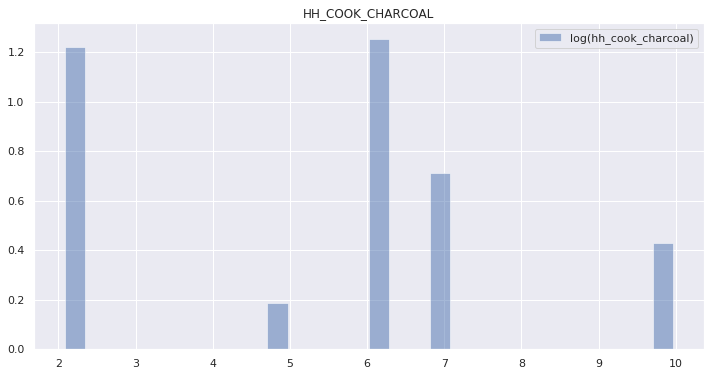

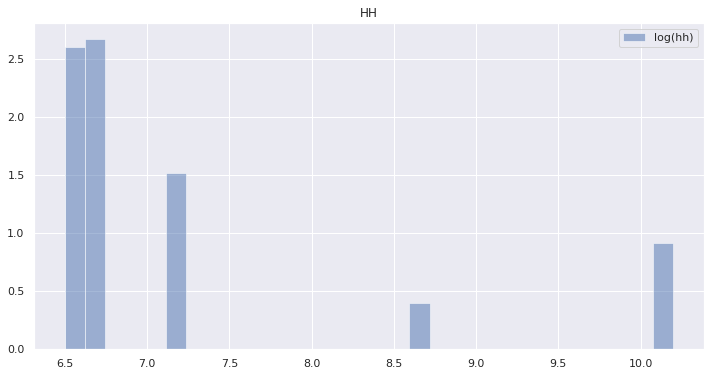

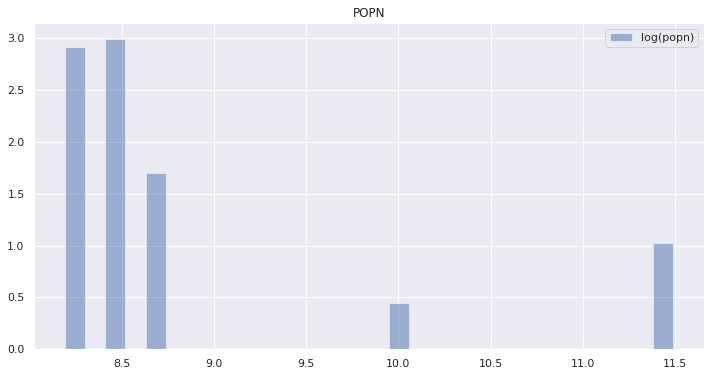

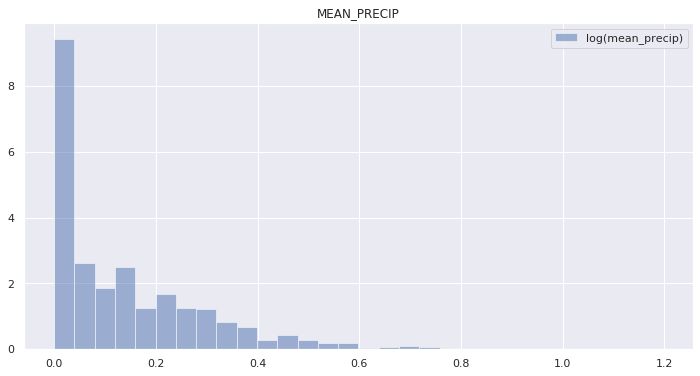

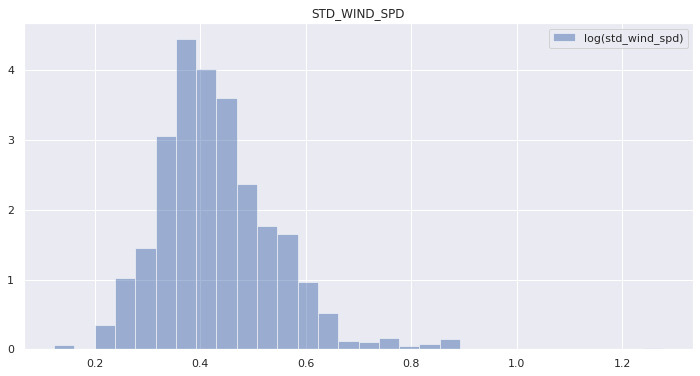

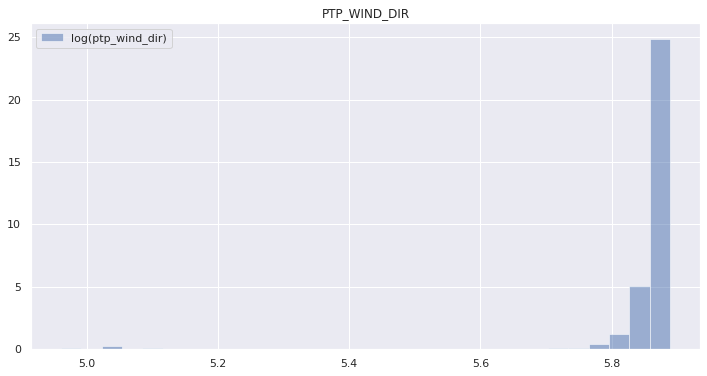

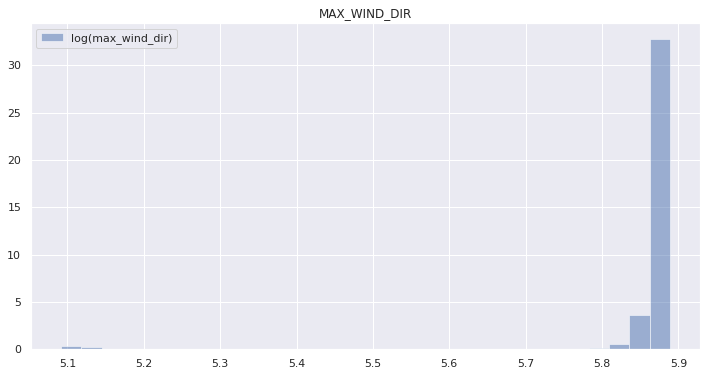

In [234]:
histogram_analysis(train, skew_feat, log=True)

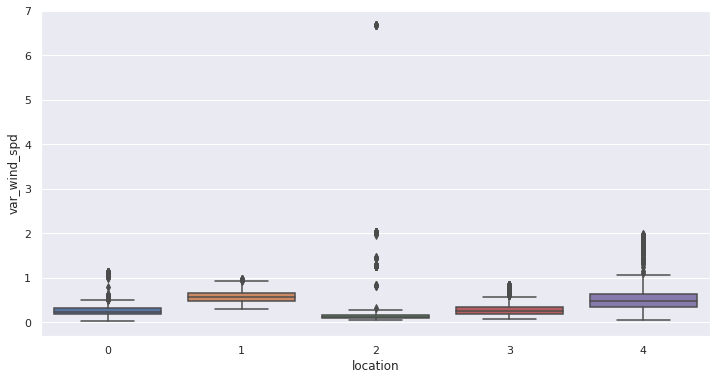

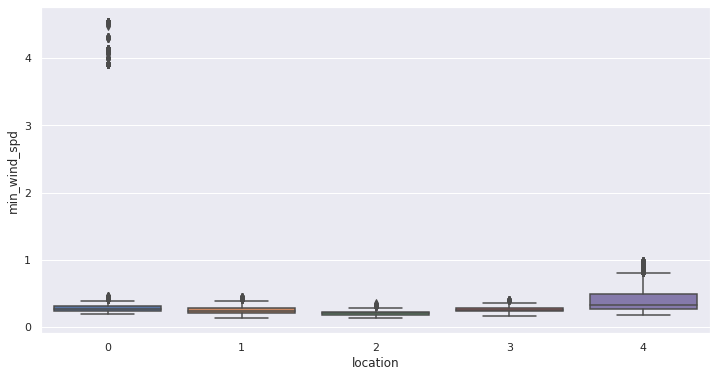

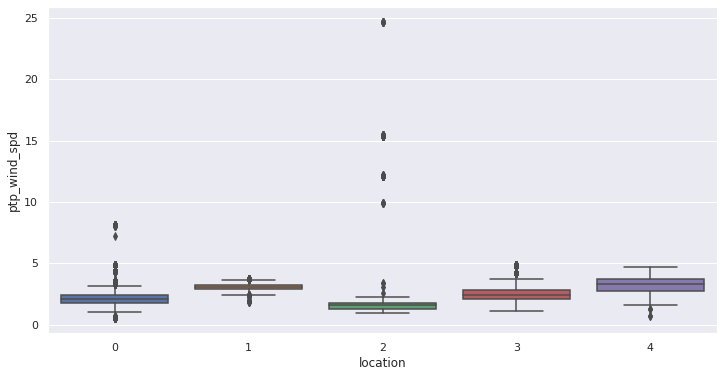

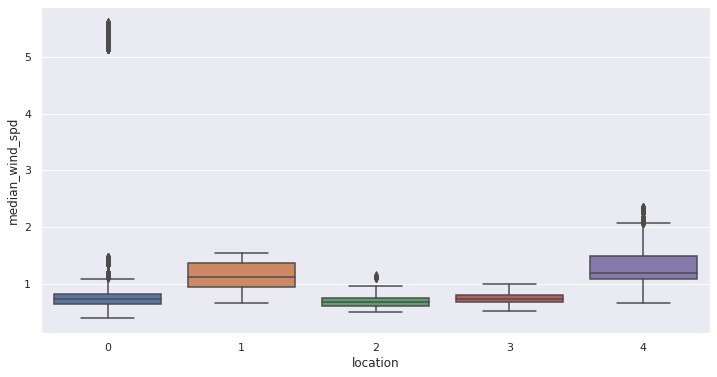

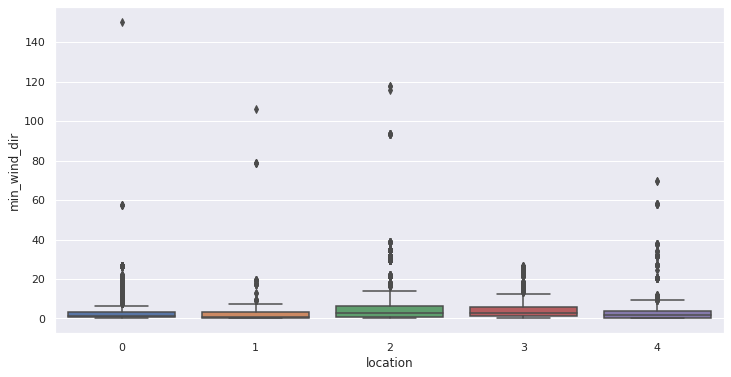

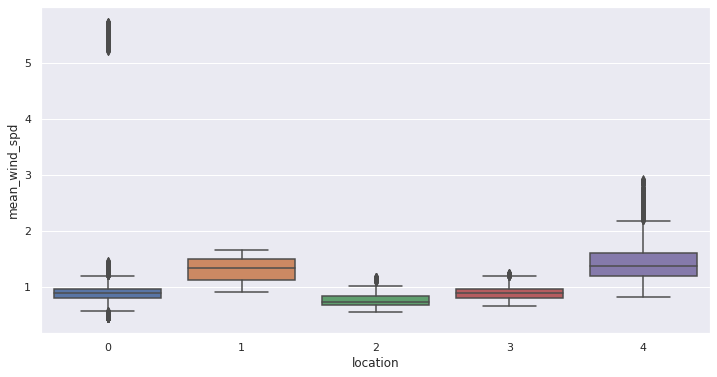

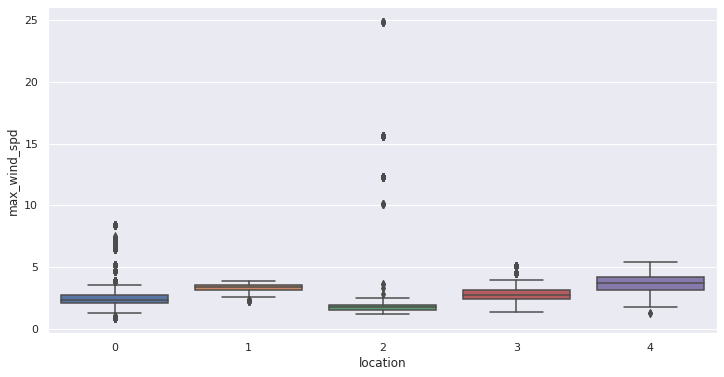

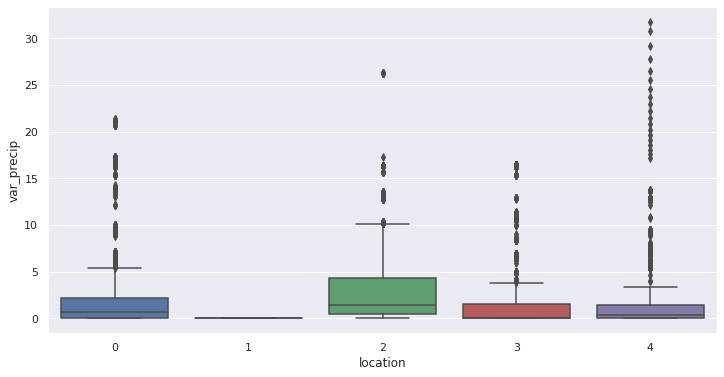

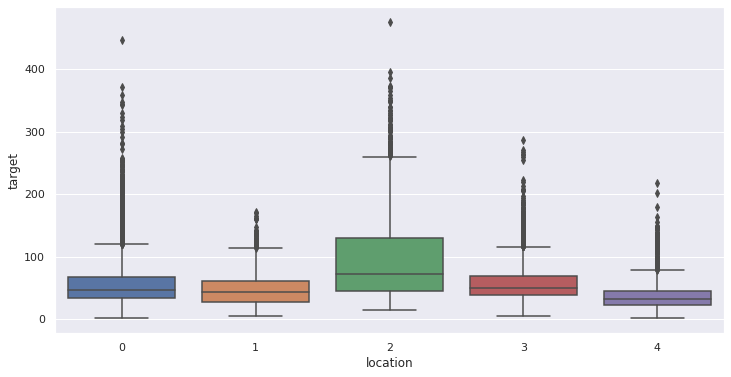

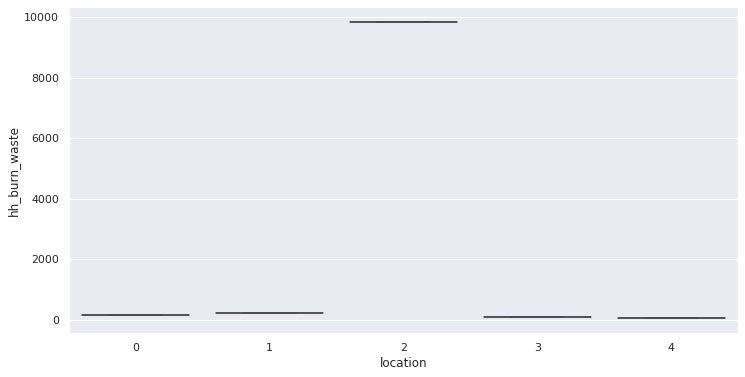

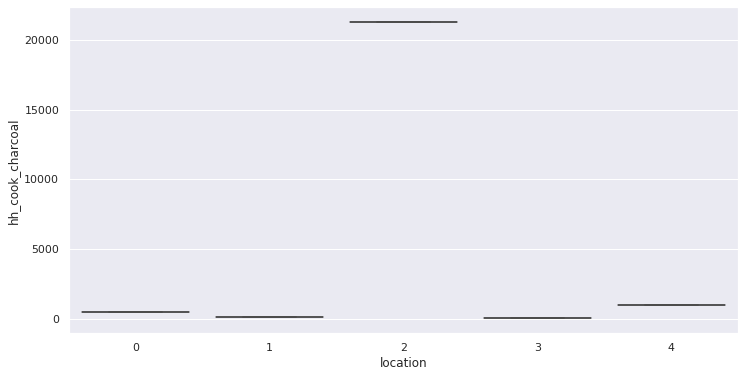

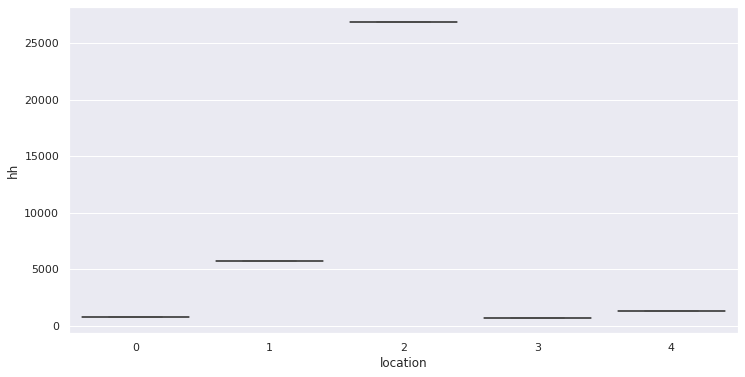

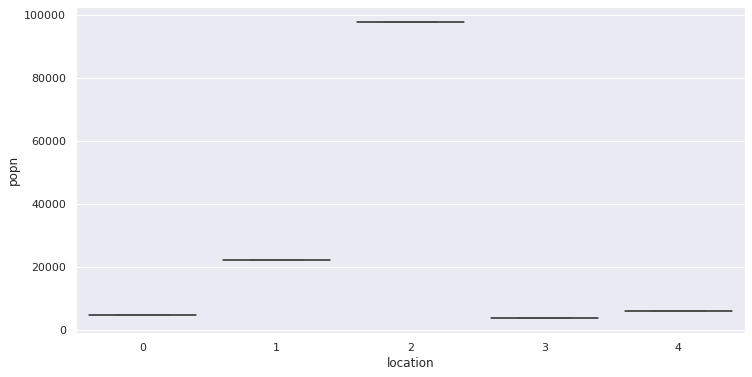

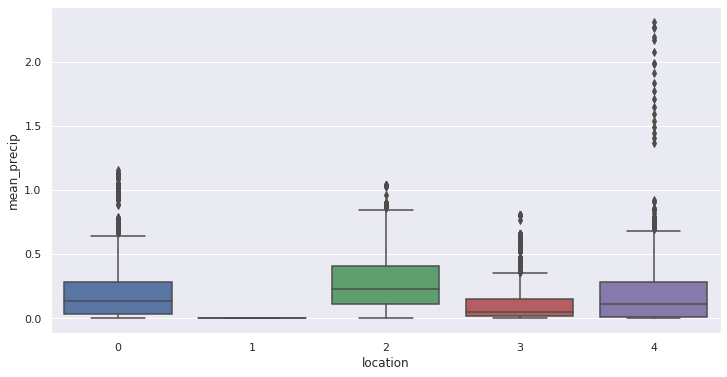

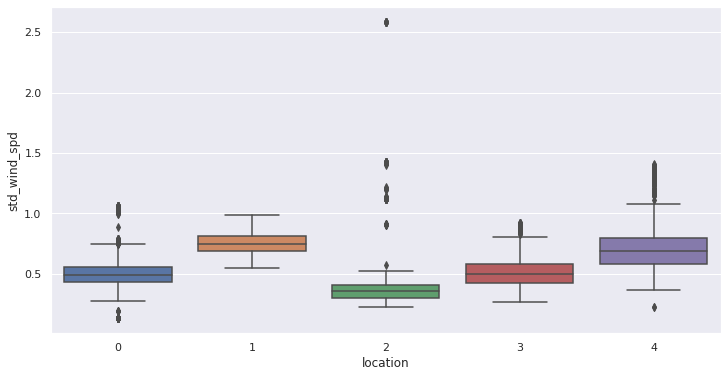

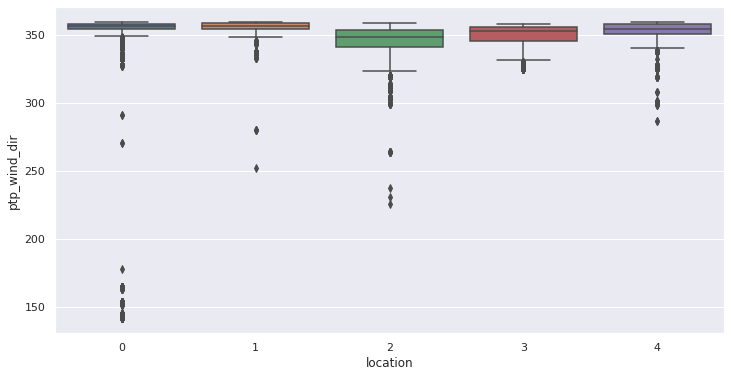

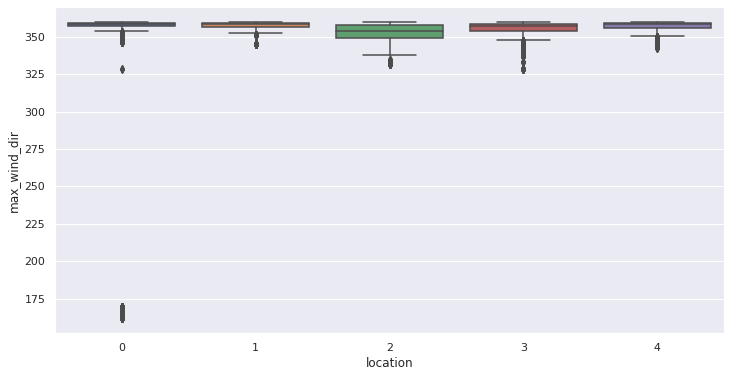

In [240]:
boxplot_analysis(train, skew_feat)

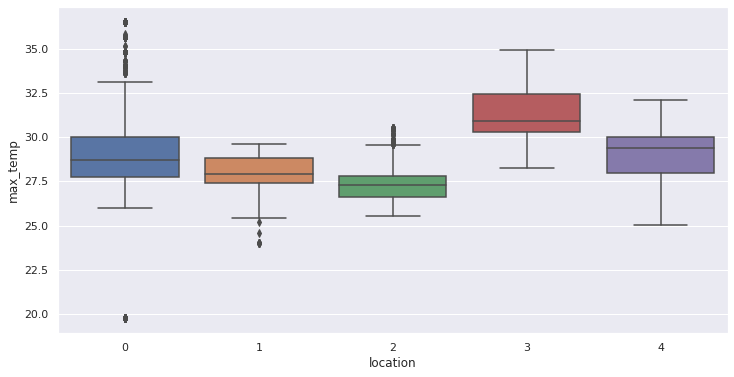

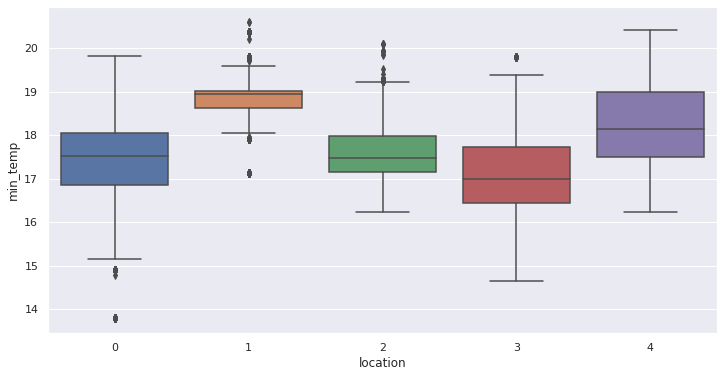

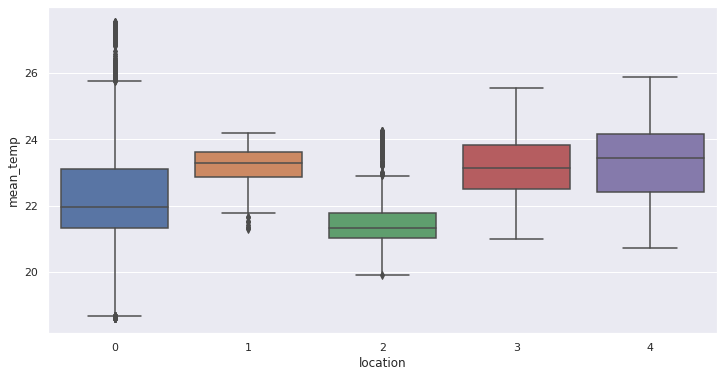

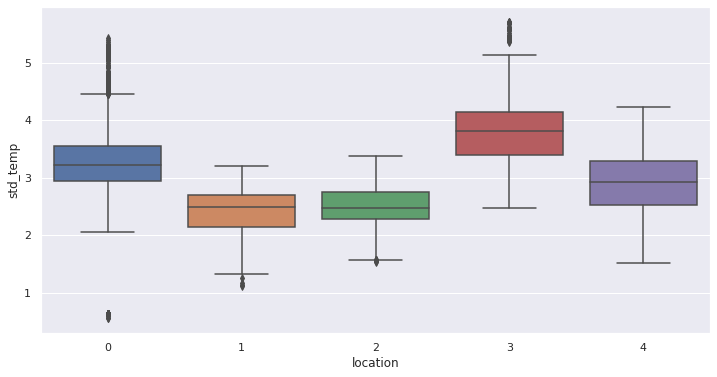

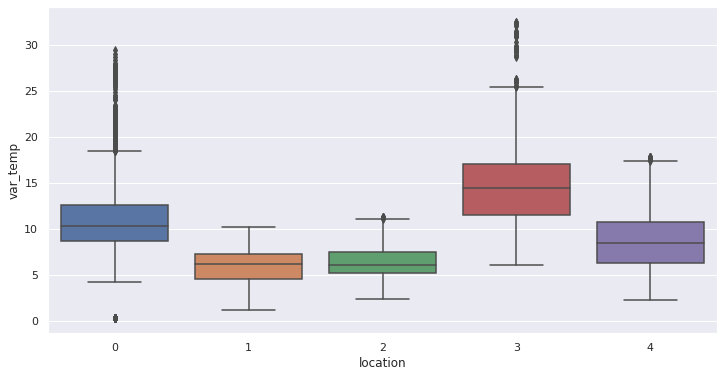

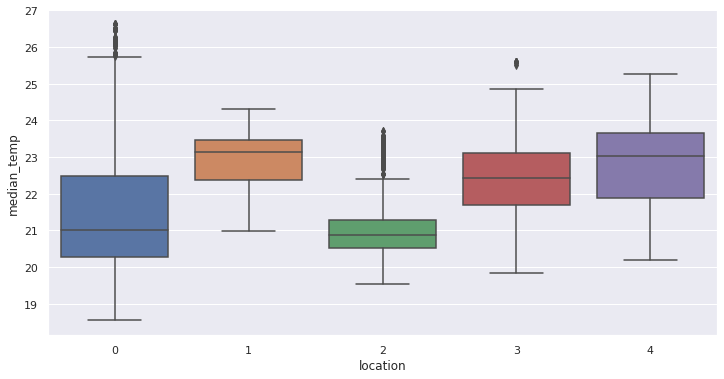

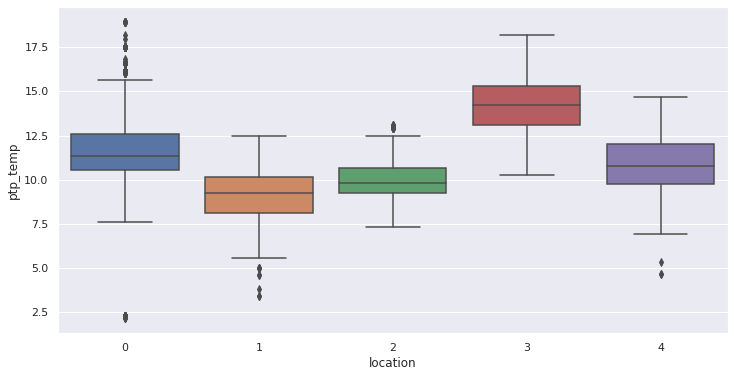

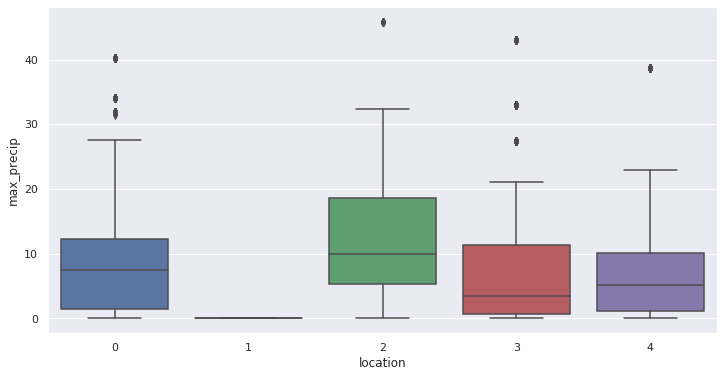

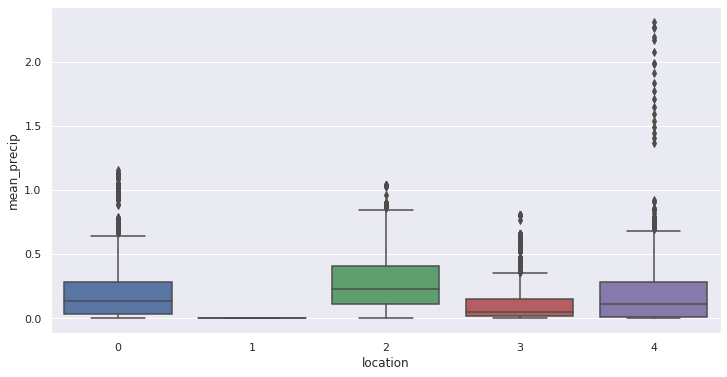

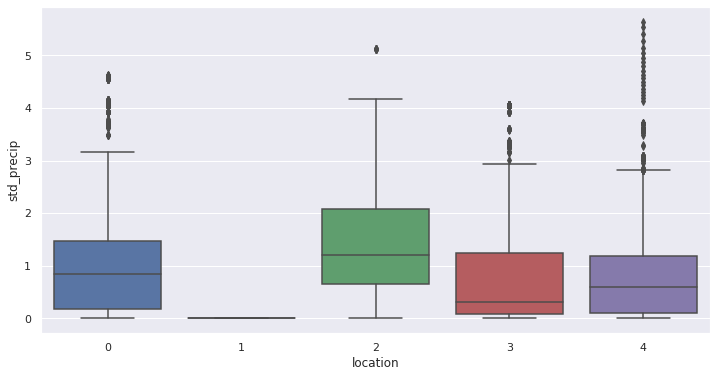

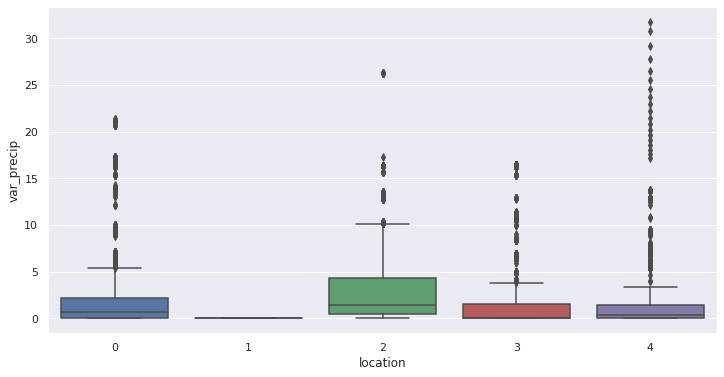

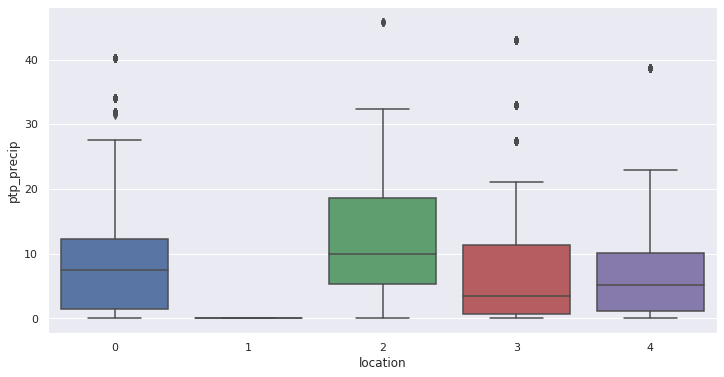

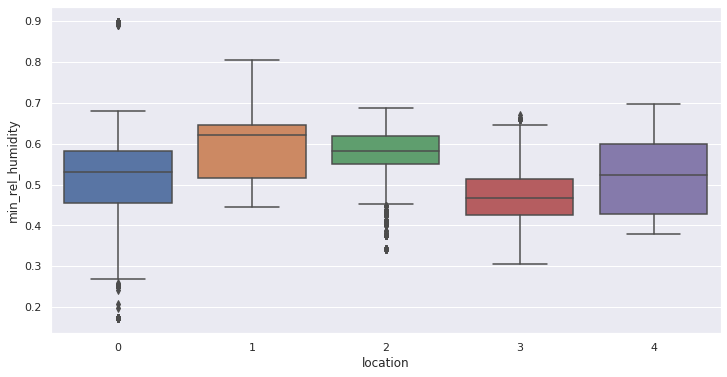

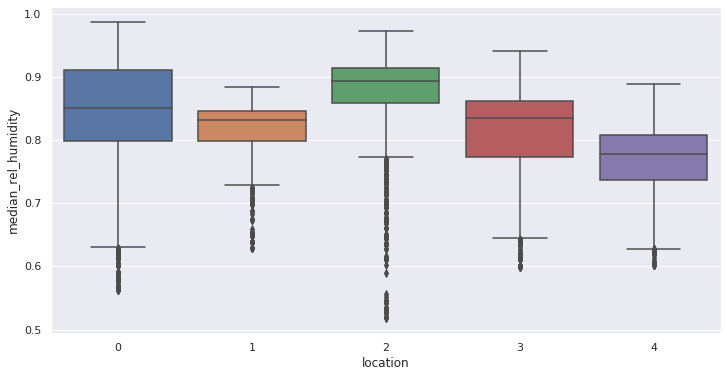

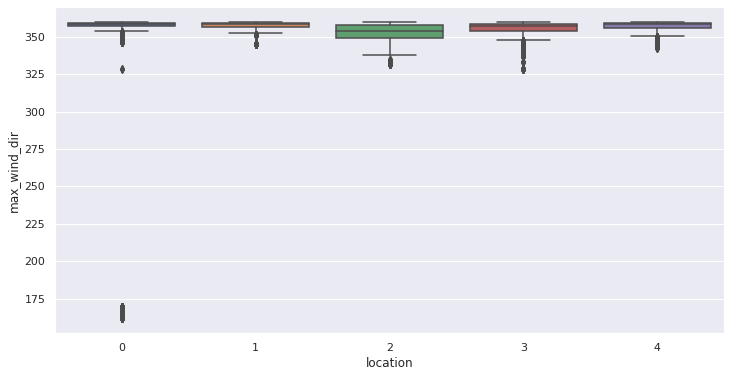

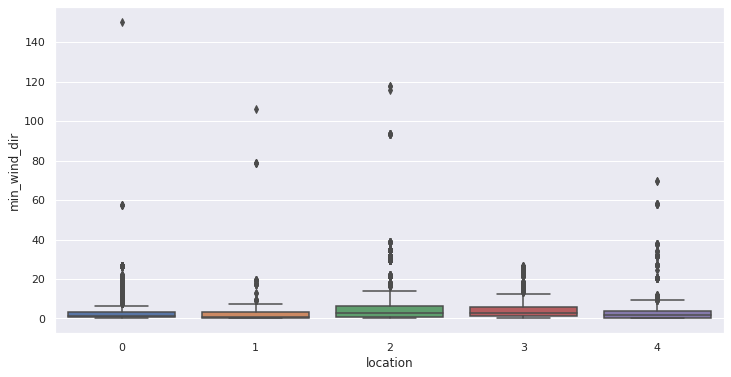

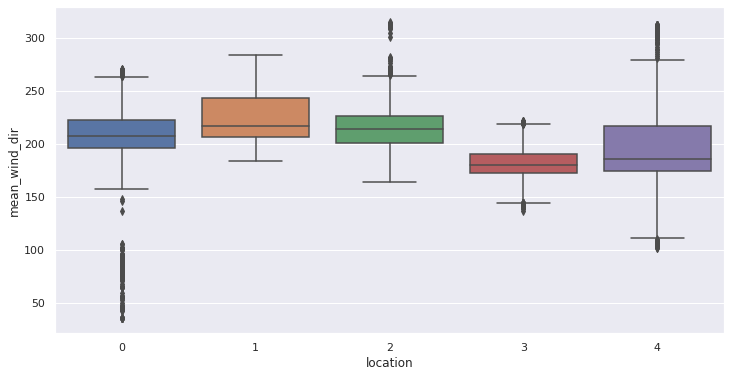

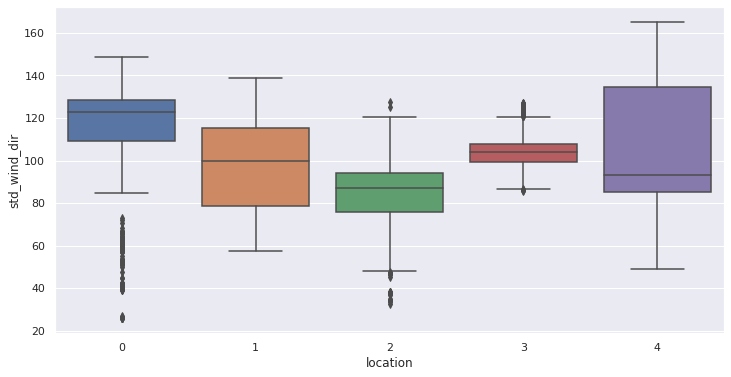

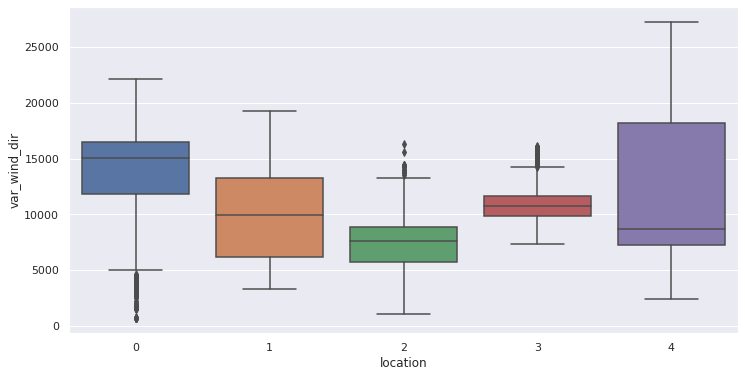

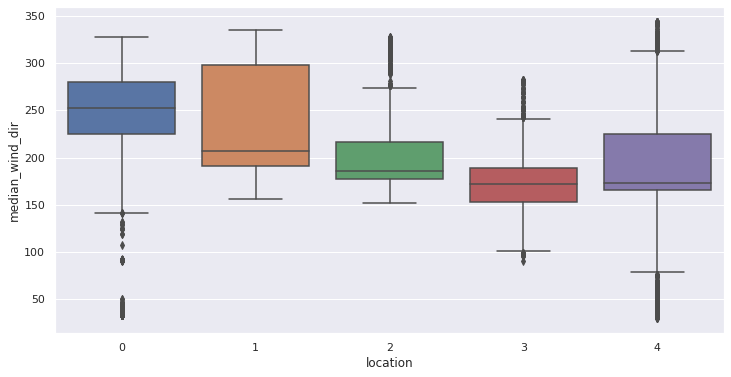

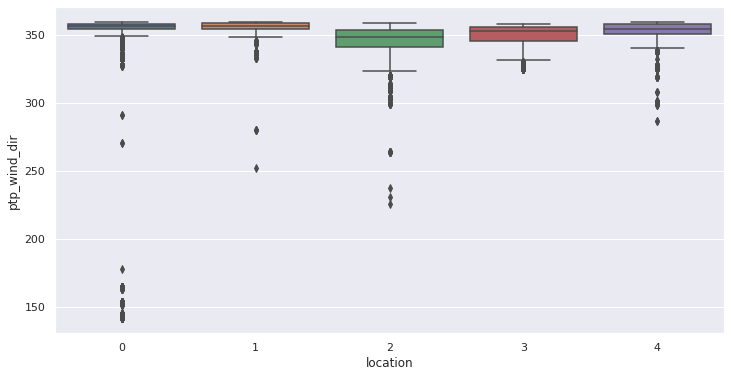

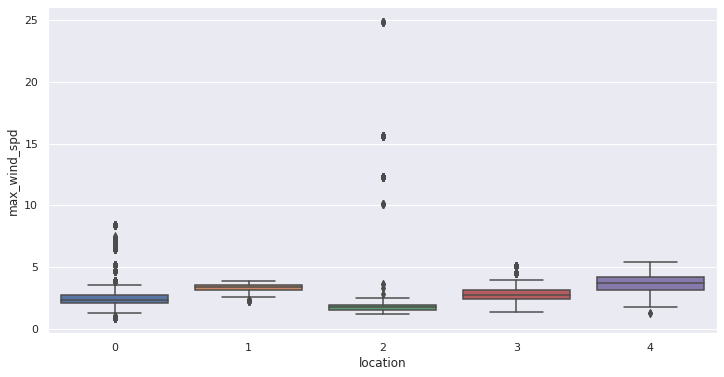

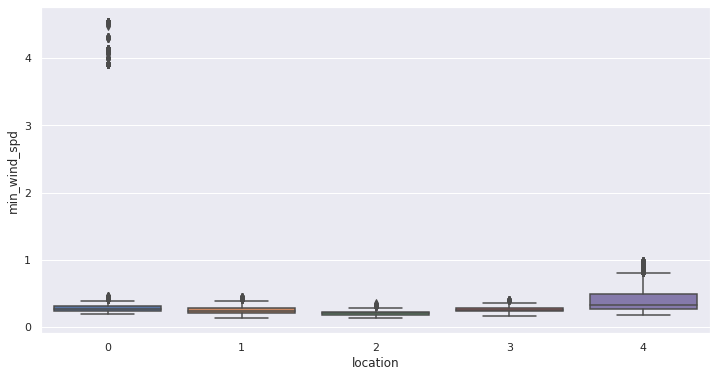

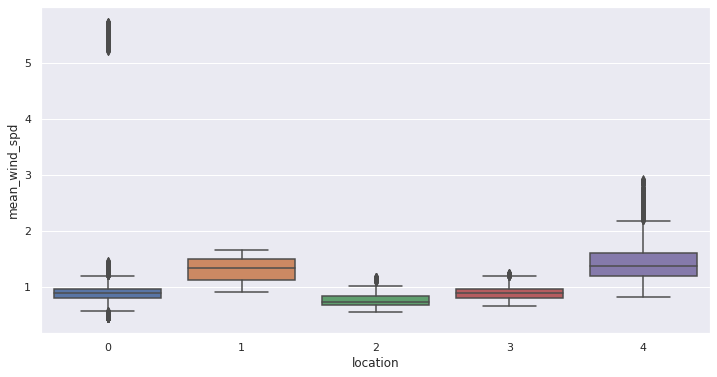

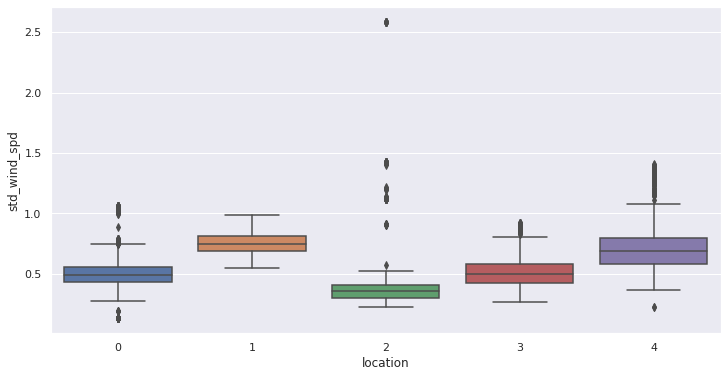

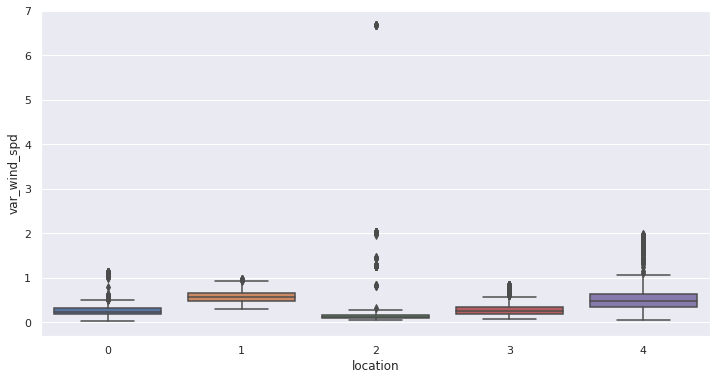

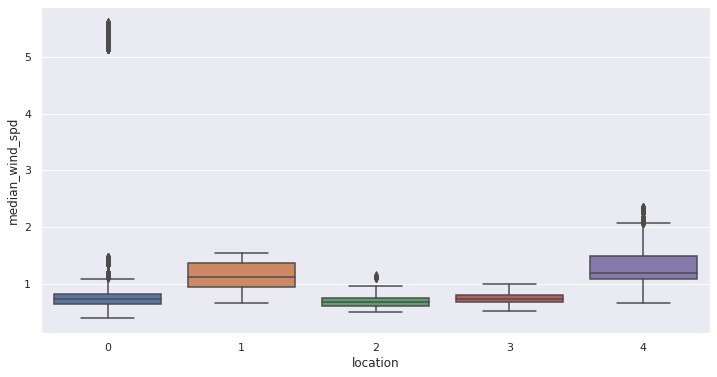

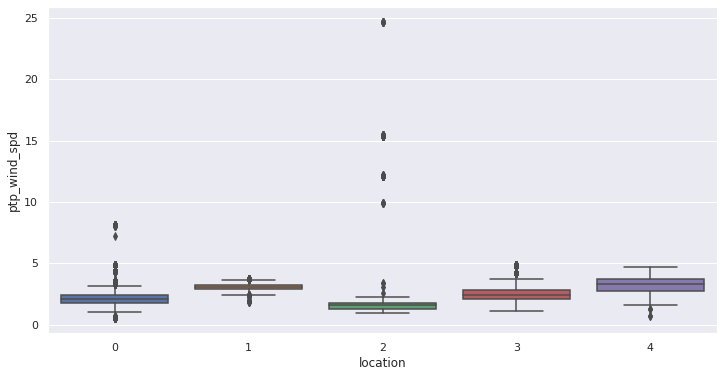

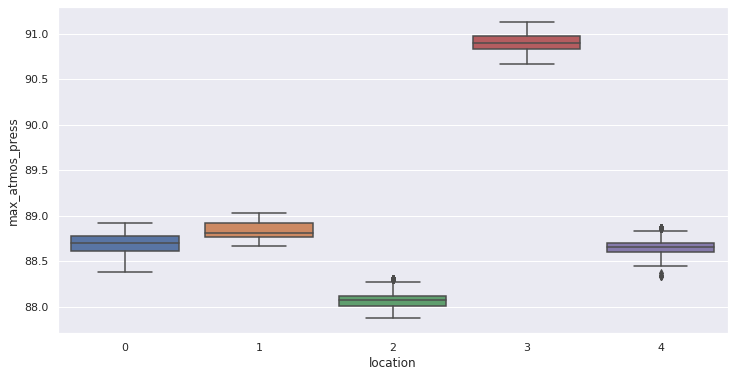

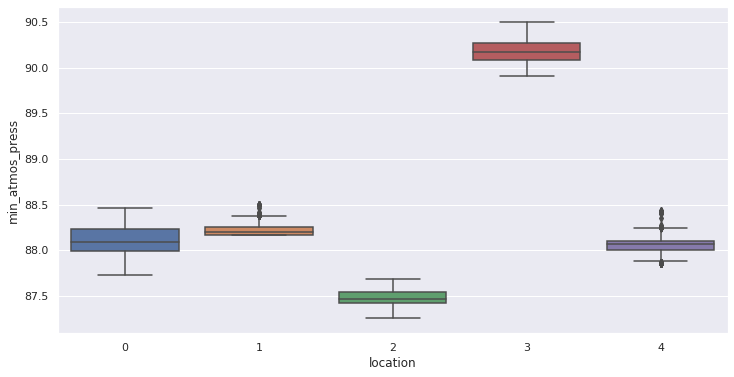

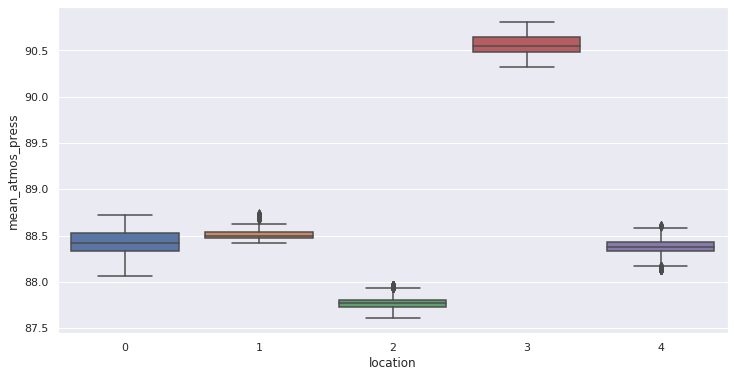

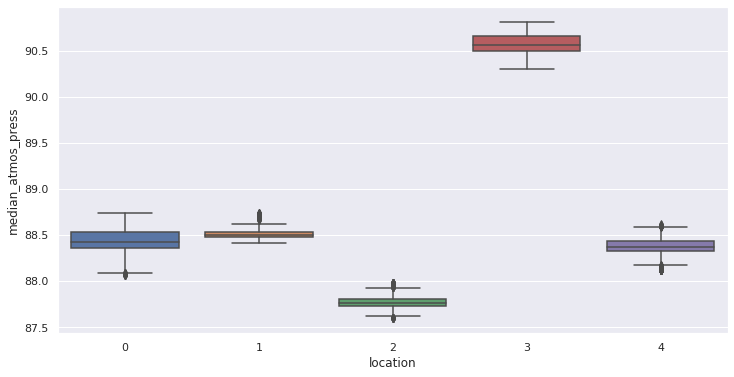

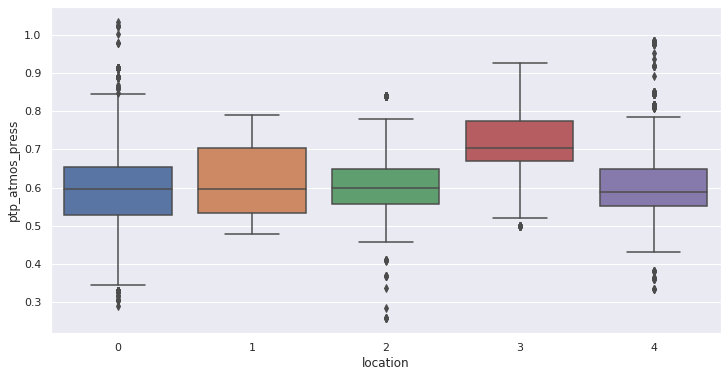

In [245]:
boxplot_analysis(train, SENSORS_COLS)

## Correlation Analysis

# Feature Engineering

## From Nan Analysis

In [209]:
train = train.drop('dist_motorway', axis=1)
valid = valid.drop('dist_motorway', axis=1)
test = test.drop('dist_motorway', axis=1)

train = train.drop('dist_trunk', axis=1)
valid = valid.drop('dist_trunk', axis=1)
test = test.drop('dist_trunk', axis=1)

train = train.drop('dist_secondary', axis=1)
valid = valid.drop('dist_secondary', axis=1)
test = test.drop('dist_secondary', axis=1)

train = train.drop('dist_primary', axis=1)
valid = valid.drop('dist_primary', axis=1)
test = test.drop('dist_primary', axis=1)

## From Informative Analysis

In [244]:
LOW_VARIANCE_COLS = ['median_precip', 'min_precip',
                     'max_rel_humidity', 'mean_rel_humidity', 'var_atmos_press',
                     'var_rel_humidity', 'ptp_rel_humidity', 'std_rel_humidity',
                     'std_atmos_press']

for col in LOW_VARIANCE_COLS:
    SENSORS_COLS.remove(col)

In [253]:
train = train.drop(LOW_VARIANCE_COLS, axis=1)
valid = valid.drop(LOW_VARIANCE_COLS, axis=1)
test = test.drop(LOW_VARIANCE_COLS, axis=1)

## From Categorical Analysis

In [53]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
all_data = train.append(valid).append(test)

In [ ]:
encoded_id, uniques_id = pd.factorize(all_data.ID)

train_size, valid_size, test_size = train.shape[0], valid.shape[0], test.shape[0]

train.ID = encoded_id[:train_size]
valid.ID = encoded_id[train_size : train_size + valid_size] 
test.ID = encoded_id[valid_size : valid_size + test_size] 

In [58]:
le = LabelEncoder().fit(all_data.location)

train.location = le.transform(train.location)
valid.location = le.transform(valid.location)
test.location = le.transform(test.location)

ID location      target   max_temp   min_temp  mean_temp  std_temp  \
0     5035        C   45.126304  27.208333  19.275000  22.299527  2.594011   
1     5036        D   79.131702  33.616667  17.983333  24.679063  4.266955   
2     5037        A   32.661304  31.841667  18.458333  24.112317  3.776377   
3     5038        A   53.850238  27.491667  16.941667  20.845273  3.080140   
4     5039        A  177.418750  28.750000  17.525000  21.870732  3.286870   
...    ...      ...         ...        ...        ...        ...       ...   
5030  5030        C         NaN  26.325000  17.125000  21.185537  2.379269   
5031  5031        D         NaN  32.550000  16.183333  22.931926  4.467736   
5032  5032        E         NaN  30.925000  16.241667  23.625069  3.973509   
5033  5033        A         NaN  28.041667  15.583333  21.579282  3.224815   
5034  5034        C         NaN  26.416667  16.600000  21.038805  2.693531   

       var_temp  median_temp   ptp_temp  ...  var_wind_spd  median_wind_spd  \
0      6.728895    21.358333   7.933333  ...      0.155268         0.666250   
1     18.206903    23.791667  15.633333  ...      0.290736         0.744167   
2     14.261020    23.304167  13.383333  ...      0.342484         0.942500   
3      9.487259    19.541667  10.550000  ...      0.336701         1.388333   
4     10.803515    20.950000  11.225000  ...      0.181690         0.542917   
...         ...          ...        ...  ...           ...              ...   
5030   5.660923    20.725000   9.200000  ...      0.123049         0.675000   
5031  19.960669    21.212500  16.366667  ...      0.479860         0.879167   
5032  15.788770    22.408333  14.683333  ...      0.856878         1.750000   
5033  10.399431    21.125000  12.458333  ...      0.178018         0.631667   
5034   7.255110    20.566667   9.816667  ...      0.156589         0.748333   

      ptp_wind_spd  max_atmos_press  min_atmos_press  mean_atmos_press  \
0         1.355000        87.871667        87.614167         87.752434   
1         2.760833        90.725000        90.056667         90.429924   
2         2.420000        88.813333        87.982500         88.420931   
3         2.469167        88.685000        87.965000         88.376915   
4         1.796667        88.719167        88.268333         88.538104   
...            ...              ...              ...               ...   
5030      1.576667        88.085833        87.389167         87.699704   
5031      3.022500        90.949167        90.199167         90.640585   
5032      3.704167        88.662500        88.067500         88.375510   
5033      1.780000        88.630833        88.064167         88.389022   
5034      1.420833        88.242500        87.605000         87.922500   

      std_atmos_press  var_atmos_press  median_atmos_press  ptp_atmos_press  
0            0.070374         0.004952           87.762083         0.257500  
1            0.156000         0.024336           90.429167         0.668333  
2            0.179481         0.032213           88.425000         0.830833  
3            0.161758         0.026166           88.400000         0.720000  
4            0.118369         0.014011           88.552500         0.450833  
...               ...              ...                 ...              ...  
5030         0.153148         0.023454           87.695000         0.696667  
5031         0.166249         0.027639           90.660833         0.750000  
5032         0.133175         0.017736           88.390833         0.595000  
5033         0.141884         0.020131           88.401667         0.566667  
5034         0.138060         0.019061           87.930833         0.637500  

[25609 rows x 45 columns]

# Preprocessing

In [369]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

## No Scaling

In [370]:
x_train = train.drop(['target'], axis=1)
y_train = train.target

x_test = test

## Standard Scaler

In [322]:
# STANDARD SCALING
x_train = train.drop(['target'], axis=1)
y_train = train.target

all_data = x_train.append(test)

scaler = StandardScaler().fit(all_data)

x_train = scaler.transform(x_train)
x_test = scaler.transform(test)

y_train = StandardScaler().fit_transform(y_train.values.reshape(-1,1))

## Robust Scaler

In [410]:
# ROBUST SCALER
x_train = train.drop(['target'], axis=1)
y_train = train.target

all_data = x_train.append(test)

a, b = 5, 95

rob_scaler = RobustScaler(quantile_range=(a,b)).fit(all_data)

x_train = rob_scaler.fit_transform(x_train)
x_test = rob_scaler.transform(test)

y_train = rob_scaler.fit_transform(y_train.values.reshape(-1,1))

## Train-Validation Split

In [411]:
x_data = x_train
y_data = y_train

split=0.8
size = int(len(x_train)*split)

x_train, y_train = x_data[:size], y_data[:size]

x_valid, y_valid = x_data[size:], y_data[size:]

x_train.shape, x_valid.shape

((12431, 46), (3108, 46))

In [407]:
models_dict = {'Model':[],
               'R2':[],
               'RMSE':[]}

In [408]:
def RMSE(y, y_pred):
    
    return np.sqrt(mean_squared_error(y, y_pred))

def grid_search_cv(model, parameters, x_train, y_train, k_fold=10, verbose=0, n_jobs=1):
    
    result = GridSearchCV(model, parameters, cv=KFold(k_fold),
                                   scoring='neg_root_mean_squared_error',
                                     verbose=verbose,
                                         n_jobs=n_jobs).fit(x_train, y_train)
    print(result.best_estimator_)
    
    return result

def test_evaluation(model, x_test, y_test):
    print('------- Test Evaluation -------\n')
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    
    print('R2:\t{:.5f}'.format(r2))
    print('RMSE:\t{:.5f}'.format(rmse))

    x = range(0, len(y_test))
    plt.scatter(x, y_test, label='True')
    plt.scatter(x, y_pred, label='Pred')
    plt.legend()
    plt.show()
    
    return r2, rmse

## Linear Regression

------- Test Evaluation -------

R2:	0.15771
RMSE:	0.33921


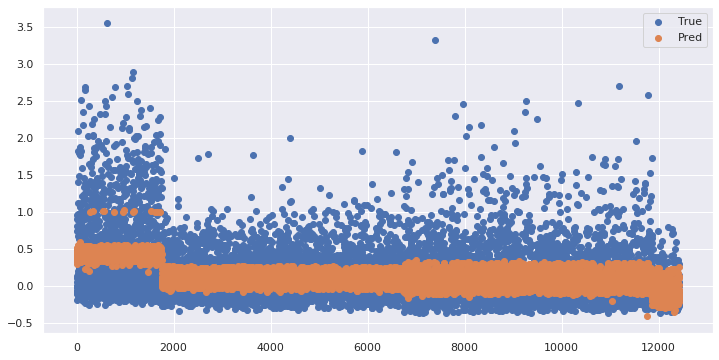

------- Test Evaluation -------

R2:	-2726312660577723351040.00000
RMSE:	11100030742.51747


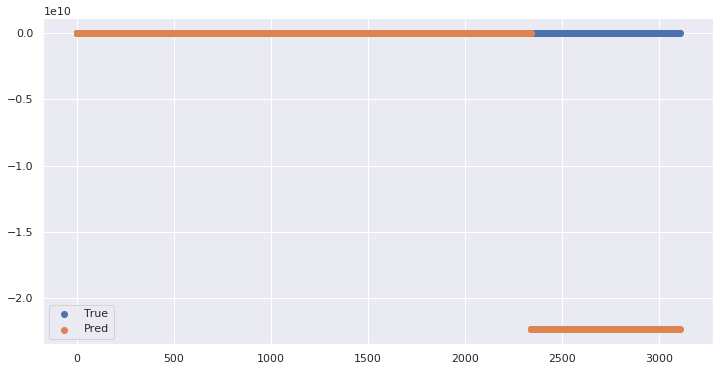

In [412]:
linear_regr = LinearRegression(fit_intercept=True)

# SIMPLEST VERSION
linear_regr.fit(x_train, y_train)

r2_linear, rmse_linear = test_evaluation(linear_regr, x_train, y_train)

r2_linear, rmse_linear = test_evaluation(linear_regr, x_valid, y_valid)

In [289]:
models_dict['Model'].append('Lin.Regr.')
models_dict['R2'].append(r2_linear)
models_dict['RMSE'].append(rmse_linear)

## Ridge Regression

In [413]:
alphas = [0.001, 0.01, 0.05, 0.1, 0.3, 0.07, 1, 2, 2.5, 3, 4, 5]

params = {'alpha':alphas}
res = grid_search_cv(Ridge(), params, x_train, y_train, k_fold=10)

df_score = pd.DataFrame({'Alpha':alphas, 'score':res.cv_results_['mean_test_score']})
df_score = df_score.sort_values(by='score', ascending=False)
display(df_score.head())

best_alpha = df_score.iloc[0]['Alpha']
best_alpha

Ridge(alpha=4, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


Alpha     score
10    4.0 -0.326046
9     3.0 -0.326048
8     2.5 -0.326059
11    5.0 -0.326063
7     2.0 -0.326082

4.0

------- Test Evaluation -------

R2:	0.15830
RMSE:	0.33910


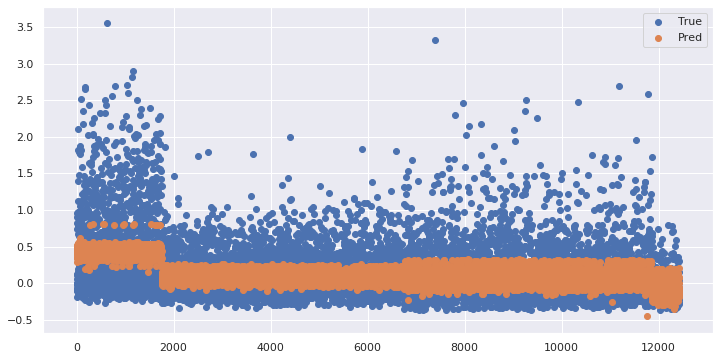

------- Test Evaluation -------

R2:	0.00661
RMSE:	0.21188


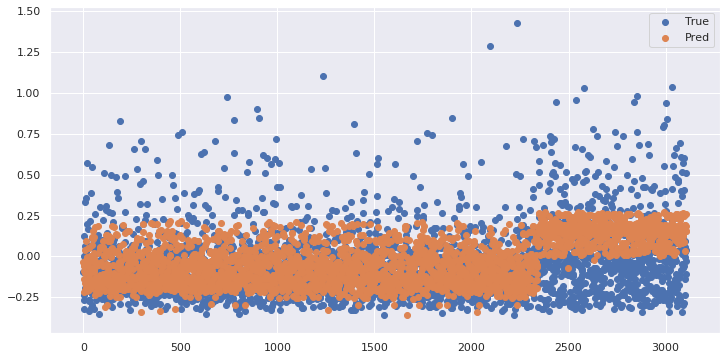

In [414]:
ridge_model = Ridge(alpha=best_alpha).fit(x_train, y_train)

r2_ridge, rmse_ridge = test_evaluation(ridge_model, x_train, y_train)

r2_ridge, rmse_ridge = test_evaluation(ridge_model, x_valid, y_valid)

In [299]:
models_dict['Model'].append('Ridge.Regr.')
models_dict['R2'].append(r2_ridge)
models_dict['RMSE'].append(rmse_ridge)

## Lasso Regression

In [415]:
params = {'alpha':alphas}

res = grid_search_cv(Lasso(), params, x_train, y_train, k_fold=10)

df_score = pd.DataFrame({'Alpha':alphas, 'score':res.cv_results_['mean_test_score']})
df_score = df_score.sort_values(by='score', ascending=True)
display(df_score.head())

best_alpha = df_score.iloc[0]['Alpha']
best_alpha

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


Alpha     score
2   0.05 -0.352836
3   0.10 -0.352836
4   0.30 -0.352836
5   0.07 -0.352836
6   1.00 -0.352836

0.05

------- Test Evaluation -------

R2:	-0.70968
RMSE:	0.27797


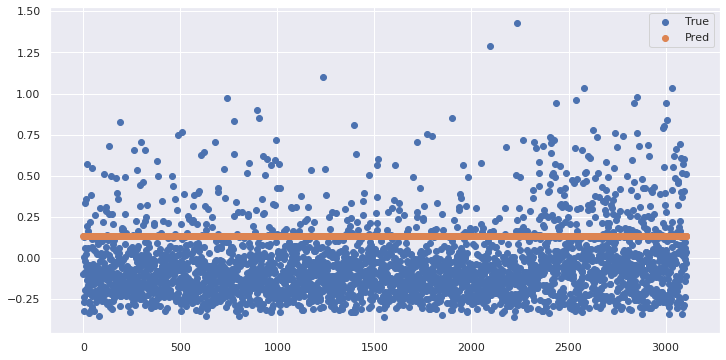

In [416]:
lasso_model = Lasso(best_alpha).fit(x_train, y_train)

r2_lasso, rmsle_lasso = test_evaluation(lasso_model, x_valid, y_valid)

In [ ]:
models_dict['Model'].append('Lasso.Regr.')
models_dict['R2'].append(r2_ridge)
models_dict['RMSE'].append(rmse_ridge)

## Ensembles

### Random Forest

In [303]:
rf = RandomForestRegressor()

In [417]:
rf = RandomForestRegressor(random_state = 10)

depth = [50]
n_features = [7]
n_est = [1000]

params = {'max_depth':depth, 'n_estimators':n_est, 'max_features':n_features}

rf_grid = grid_search_cv(rf, params, x_train, y_train.ravel(), k_fold=4, verbose=4, n_jobs=-1)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   45.3s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)


In [418]:
rf_grid.best_score_

-0.32124451459314773

In [419]:
rf_grid.best_params_

{'max_depth': 50, 'max_features': 7, 'n_estimators': 1000}

------- Test Evaluation -------

R2:	0.18864
RMSE:	0.19149


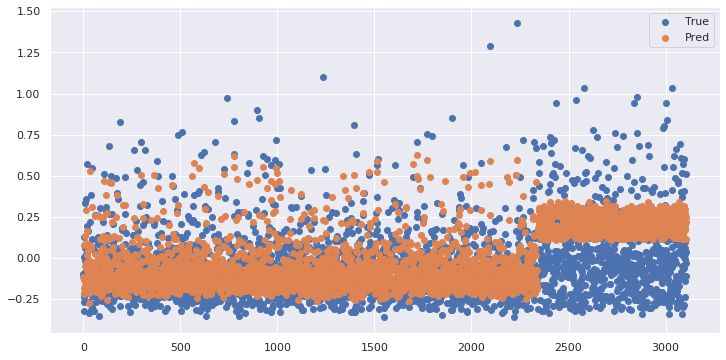

In [421]:
r2_rf, rmse_rf = test_evaluation(rf_grid.best_estimator_, x_valid, y_valid) #0.15, 0.55

In [ ]:
models_dict['Model'].append('Random_Foresr')
models_dict['R2'].append(r2_rf)
models_dict['RMSE'].append(rmse_rf)

# XGBoost

In [329]:
from xgboost import XGBRegressor

In [422]:
xgb = XGBRegressor(objective='reg:squarederror',
                    eval_metric = 'rmse',
                   random_state=10)

params = {'n_estimators':[300], 
          'max_depth':[5],
          'learning_rate':[0.3, 0.2]}

res_xgb = grid_search_cv(xgb, params, x_train, y_train, verbose=7, n_jobs=7)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  10 out of  20 | elapsed:   38.3s remaining:   38.3s
[Parallel(n_jobs=7)]: Done  13 out of  20 | elapsed:   39.7s remaining:   21.4s
[Parallel(n_jobs=7)]: Done  16 out of  20 | elapsed:   53.8s remaining:   13.4s
[Parallel(n_jobs=7)]: Done  20 out of  20 | elapsed:   55.8s finished


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
             n_estimators=300, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=10, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)


In [425]:
res_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

------- Test Evaluation -------

R2:	0.09062
RMSE:	0.20273


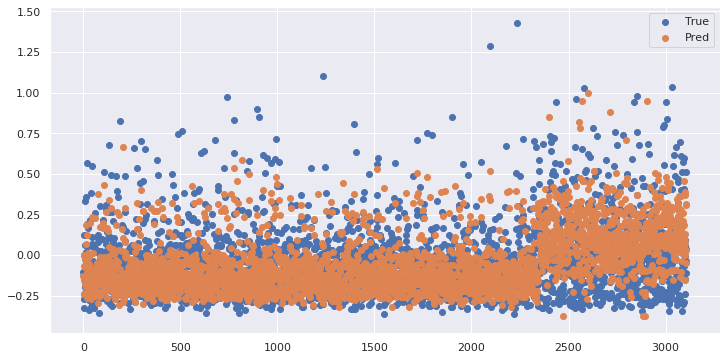

(0.09062436267394891, 0.20272532668404522)

In [426]:
test_evaluation(res_xgb.best_estimator_, x_valid, y_valid)

## XGB

In [477]:
import xgboost

In [428]:
dtrain = xgboost.DMatrix(data=x_train,label=y_train)
dvalid = xgboost.DMatrix(data=x_valid,label=y_valid)
dtest = xgboost.DMatrix(data=x_test)

In [429]:
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

In [471]:
param = {'gamma':3,
         'max_depth': 5,
         'eta': 0.005,
         'objective': 'reg:squarederror'}
param['eval_metric'] = ['rmse']


In [472]:
num_round = 1500
bst = xgboost.train(param, dtrain, num_round, evallist)

[0]	eval-rmse:0.583414	train-rmse:0.519165
[1]	eval-rmse:0.580982	train-rmse:0.517586
[2]	eval-rmse:0.578563	train-rmse:0.516019
[3]	eval-rmse:0.576158	train-rmse:0.514462
[4]	eval-rmse:0.573765	train-rmse:0.512916
[5]	eval-rmse:0.571386	train-rmse:0.511381
[6]	eval-rmse:0.569021	train-rmse:0.509858
[7]	eval-rmse:0.566619	train-rmse:0.508335
[8]	eval-rmse:0.56423	train-rmse:0.506823
[9]	eval-rmse:0.561902	train-rmse:0.505325
[10]	eval-rmse:0.559574	train-rmse:0.503835
[11]	eval-rmse:0.557258	train-rmse:0.502358
[12]	eval-rmse:0.554968	train-rmse:0.500895
[13]	eval-rmse:0.55281	train-rmse:0.499445
[14]	eval-rmse:0.550532	train-rmse:0.497996
[15]	eval-rmse:0.548416	train-rmse:0.496561
[16]	eval-rmse:0.546162	train-rmse:0.495133
[17]	eval-rmse:0.544066	train-rmse:0.493714
[18]	eval-rmse:0.541836	train-rmse:0.492306
[19]	eval-rmse:0.539766	train-rmse:0.49091
[20]	eval-rmse:0.53756	train-rmse:0.489521
[21]	eval-rmse:0.535391	train-rmse:0.488147
[22]	eval-rmse:0.533354	train-rmse:0.486776
[2

[186]	eval-rmse:0.303284	train-rmse:0.357698
[187]	eval-rmse:0.302276	train-rmse:0.357309
[188]	eval-rmse:0.301289	train-rmse:0.356934
[189]	eval-rmse:0.300505	train-rmse:0.356545
[190]	eval-rmse:0.299733	train-rmse:0.356183
[191]	eval-rmse:0.298751	train-rmse:0.355797
[192]	eval-rmse:0.29799	train-rmse:0.355441
[193]	eval-rmse:0.297209	train-rmse:0.35507
[194]	eval-rmse:0.296452	train-rmse:0.3547
[195]	eval-rmse:0.29551	train-rmse:0.354343
[196]	eval-rmse:0.29456	train-rmse:0.353972
[197]	eval-rmse:0.293825	train-rmse:0.353632
[198]	eval-rmse:0.293086	train-rmse:0.353266
[199]	eval-rmse:0.292349	train-rmse:0.352895
[200]	eval-rmse:0.291604	train-rmse:0.35256
[201]	eval-rmse:0.290876	train-rmse:0.352194
[202]	eval-rmse:0.290218	train-rmse:0.351861
[203]	eval-rmse:0.289511	train-rmse:0.35153
[204]	eval-rmse:0.288809	train-rmse:0.35119
[205]	eval-rmse:0.288086	train-rmse:0.350869
[206]	eval-rmse:0.287382	train-rmse:0.350517
[207]	eval-rmse:0.286494	train-rmse:0.350193
[208]	eval-rmse:0.2

[370]	eval-rmse:0.221367	train-rmse:0.318679
[371]	eval-rmse:0.221186	train-rmse:0.318576
[372]	eval-rmse:0.221017	train-rmse:0.318431
[373]	eval-rmse:0.220732	train-rmse:0.318291
[374]	eval-rmse:0.220556	train-rmse:0.318178
[375]	eval-rmse:0.220385	train-rmse:0.318095
[376]	eval-rmse:0.220197	train-rmse:0.317959
[377]	eval-rmse:0.220023	train-rmse:0.31786
[378]	eval-rmse:0.219828	train-rmse:0.317773
[379]	eval-rmse:0.219644	train-rmse:0.317663
[380]	eval-rmse:0.219374	train-rmse:0.317552
[381]	eval-rmse:0.219211	train-rmse:0.317414
[382]	eval-rmse:0.219039	train-rmse:0.317316
[383]	eval-rmse:0.21886	train-rmse:0.317205
[384]	eval-rmse:0.218675	train-rmse:0.317121
[385]	eval-rmse:0.218512	train-rmse:0.317016
[386]	eval-rmse:0.218284	train-rmse:0.316889
[387]	eval-rmse:0.218058	train-rmse:0.316764
[388]	eval-rmse:0.217887	train-rmse:0.316644
[389]	eval-rmse:0.217668	train-rmse:0.316528
[390]	eval-rmse:0.217501	train-rmse:0.316387
[391]	eval-rmse:0.217286	train-rmse:0.316273
[392]	eval-r

[553]	eval-rmse:0.201414	train-rmse:0.306332
[554]	eval-rmse:0.201387	train-rmse:0.306323
[555]	eval-rmse:0.20136	train-rmse:0.306314
[556]	eval-rmse:0.201334	train-rmse:0.306306
[557]	eval-rmse:0.201307	train-rmse:0.306297
[558]	eval-rmse:0.201281	train-rmse:0.306289
[559]	eval-rmse:0.201254	train-rmse:0.306281
[560]	eval-rmse:0.201228	train-rmse:0.306274
[561]	eval-rmse:0.201203	train-rmse:0.306265
[562]	eval-rmse:0.201177	train-rmse:0.306258
[563]	eval-rmse:0.201152	train-rmse:0.306251
[564]	eval-rmse:0.201126	train-rmse:0.306243
[565]	eval-rmse:0.201101	train-rmse:0.306235
[566]	eval-rmse:0.201077	train-rmse:0.306228
[567]	eval-rmse:0.201052	train-rmse:0.306221
[568]	eval-rmse:0.201027	train-rmse:0.306213
[569]	eval-rmse:0.201003	train-rmse:0.306205
[570]	eval-rmse:0.200979	train-rmse:0.306199
[571]	eval-rmse:0.200955	train-rmse:0.306192
[572]	eval-rmse:0.200931	train-rmse:0.306185
[573]	eval-rmse:0.200907	train-rmse:0.306178
[574]	eval-rmse:0.200884	train-rmse:0.30617
[575]	eval-r

[736]	eval-rmse:0.198597	train-rmse:0.305621
[737]	eval-rmse:0.19859	train-rmse:0.305619
[738]	eval-rmse:0.198582	train-rmse:0.305618
[739]	eval-rmse:0.198574	train-rmse:0.305617
[740]	eval-rmse:0.198566	train-rmse:0.305615
[741]	eval-rmse:0.198559	train-rmse:0.305614
[742]	eval-rmse:0.198551	train-rmse:0.305613
[743]	eval-rmse:0.198543	train-rmse:0.305612
[744]	eval-rmse:0.198536	train-rmse:0.305611
[745]	eval-rmse:0.198528	train-rmse:0.305609
[746]	eval-rmse:0.198521	train-rmse:0.305608
[747]	eval-rmse:0.198513	train-rmse:0.305606
[748]	eval-rmse:0.198506	train-rmse:0.305605
[749]	eval-rmse:0.198499	train-rmse:0.305604
[750]	eval-rmse:0.198492	train-rmse:0.305603
[751]	eval-rmse:0.198484	train-rmse:0.305602
[752]	eval-rmse:0.198477	train-rmse:0.305601
[753]	eval-rmse:0.19847	train-rmse:0.305599
[754]	eval-rmse:0.198463	train-rmse:0.305599
[755]	eval-rmse:0.198456	train-rmse:0.305598
[756]	eval-rmse:0.198449	train-rmse:0.305597
[757]	eval-rmse:0.198442	train-rmse:0.305596
[758]	eval-r

[919]	eval-rmse:0.197724	train-rmse:0.305507
[920]	eval-rmse:0.197722	train-rmse:0.305507
[921]	eval-rmse:0.197719	train-rmse:0.305507
[922]	eval-rmse:0.197716	train-rmse:0.305507
[923]	eval-rmse:0.197714	train-rmse:0.305506
[924]	eval-rmse:0.197711	train-rmse:0.305506
[925]	eval-rmse:0.197709	train-rmse:0.305506
[926]	eval-rmse:0.197706	train-rmse:0.305505
[927]	eval-rmse:0.197703	train-rmse:0.305505
[928]	eval-rmse:0.197701	train-rmse:0.305505
[929]	eval-rmse:0.197698	train-rmse:0.305505
[930]	eval-rmse:0.197696	train-rmse:0.305505
[931]	eval-rmse:0.197694	train-rmse:0.305505
[932]	eval-rmse:0.197691	train-rmse:0.305505
[933]	eval-rmse:0.197688	train-rmse:0.305504
[934]	eval-rmse:0.197686	train-rmse:0.305504
[935]	eval-rmse:0.197684	train-rmse:0.305504
[936]	eval-rmse:0.197681	train-rmse:0.305504
[937]	eval-rmse:0.197679	train-rmse:0.305503
[938]	eval-rmse:0.197676	train-rmse:0.305503
[939]	eval-rmse:0.197674	train-rmse:0.305503
[940]	eval-rmse:0.197672	train-rmse:0.305503
[941]	eval

[1101]	eval-rmse:0.197417	train-rmse:0.305489
[1102]	eval-rmse:0.197417	train-rmse:0.305489
[1103]	eval-rmse:0.197416	train-rmse:0.305489
[1104]	eval-rmse:0.197415	train-rmse:0.305488
[1105]	eval-rmse:0.197414	train-rmse:0.305488
[1106]	eval-rmse:0.197413	train-rmse:0.305488
[1107]	eval-rmse:0.197412	train-rmse:0.305489
[1108]	eval-rmse:0.197411	train-rmse:0.305488
[1109]	eval-rmse:0.19741	train-rmse:0.305489
[1110]	eval-rmse:0.197409	train-rmse:0.305489
[1111]	eval-rmse:0.197408	train-rmse:0.305488
[1112]	eval-rmse:0.197407	train-rmse:0.305488
[1113]	eval-rmse:0.197406	train-rmse:0.305488
[1114]	eval-rmse:0.197405	train-rmse:0.305488
[1115]	eval-rmse:0.197404	train-rmse:0.305488
[1116]	eval-rmse:0.197403	train-rmse:0.305489
[1117]	eval-rmse:0.197402	train-rmse:0.305489
[1118]	eval-rmse:0.197402	train-rmse:0.305488
[1119]	eval-rmse:0.197401	train-rmse:0.305488
[1120]	eval-rmse:0.1974	train-rmse:0.305488
[1121]	eval-rmse:0.197399	train-rmse:0.305488
[1122]	eval-rmse:0.197398	train-rmse:

[1280]	eval-rmse:0.197302	train-rmse:0.305487
[1281]	eval-rmse:0.197302	train-rmse:0.305486
[1282]	eval-rmse:0.197301	train-rmse:0.305486
[1283]	eval-rmse:0.197301	train-rmse:0.305486
[1284]	eval-rmse:0.197301	train-rmse:0.305486
[1285]	eval-rmse:0.1973	train-rmse:0.305486
[1286]	eval-rmse:0.1973	train-rmse:0.305486
[1287]	eval-rmse:0.197299	train-rmse:0.305486
[1288]	eval-rmse:0.197299	train-rmse:0.305486
[1289]	eval-rmse:0.197299	train-rmse:0.305486
[1290]	eval-rmse:0.197298	train-rmse:0.305486
[1291]	eval-rmse:0.197298	train-rmse:0.305486
[1292]	eval-rmse:0.197298	train-rmse:0.305486
[1293]	eval-rmse:0.197297	train-rmse:0.305486
[1294]	eval-rmse:0.197297	train-rmse:0.305486
[1295]	eval-rmse:0.197297	train-rmse:0.305486
[1296]	eval-rmse:0.197296	train-rmse:0.305486
[1297]	eval-rmse:0.197296	train-rmse:0.305486
[1298]	eval-rmse:0.197295	train-rmse:0.305486
[1299]	eval-rmse:0.197295	train-rmse:0.305486
[1300]	eval-rmse:0.197295	train-rmse:0.305486
[1301]	eval-rmse:0.197294	train-rmse:0

[1459]	eval-rmse:0.197256	train-rmse:0.305486
[1460]	eval-rmse:0.197256	train-rmse:0.305486
[1461]	eval-rmse:0.197256	train-rmse:0.305486
[1462]	eval-rmse:0.197256	train-rmse:0.305486
[1463]	eval-rmse:0.197256	train-rmse:0.305486
[1464]	eval-rmse:0.197255	train-rmse:0.305486
[1465]	eval-rmse:0.197255	train-rmse:0.305486
[1466]	eval-rmse:0.197255	train-rmse:0.305486
[1467]	eval-rmse:0.197255	train-rmse:0.305486
[1468]	eval-rmse:0.197255	train-rmse:0.305486
[1469]	eval-rmse:0.197255	train-rmse:0.305486
[1470]	eval-rmse:0.197254	train-rmse:0.305486
[1471]	eval-rmse:0.197254	train-rmse:0.305486
[1472]	eval-rmse:0.197254	train-rmse:0.305486
[1473]	eval-rmse:0.197254	train-rmse:0.305486
[1474]	eval-rmse:0.197254	train-rmse:0.305486
[1475]	eval-rmse:0.197254	train-rmse:0.305486
[1476]	eval-rmse:0.197254	train-rmse:0.305486
[1477]	eval-rmse:0.197253	train-rmse:0.305486
[1478]	eval-rmse:0.197253	train-rmse:0.305486
[1479]	eval-rmse:0.197253	train-rmse:0.305486
[1480]	eval-rmse:0.197253	train-rm

In [473]:
valid_pred = bst.predict(xgboost.DMatrix(x_valid))
RMSE(valid_pred, y_valid)

0.19725046668217344

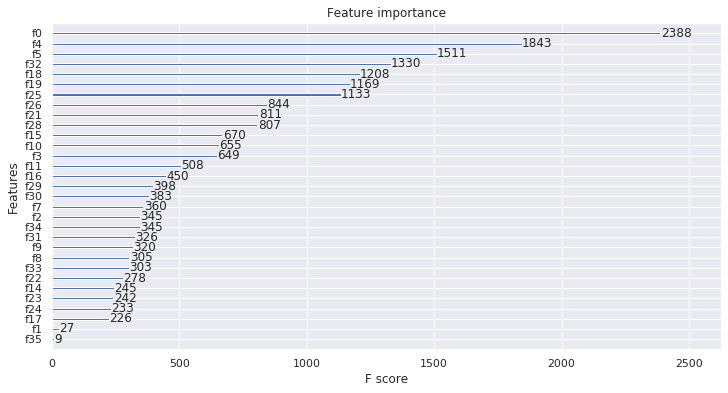

In [492]:
xgboost.plot_importance(xgb)

In [489]:
xgb = XGBRegressor(objective='reg:squarederror',
                   eval_metric = 'rmse',
                   n_estimators=1000, 
                   max_depth=5,
                   learning_rate=0.01).fit(x_train, y_train,
                                          early_stopping_rounds=10,
                                          eval_set=[(x_valid, y_valid)])

[0]	validation_0-rmse:0.580962
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:0.576117
[2]	validation_0-rmse:0.571327
[3]	validation_0-rmse:0.566589
[4]	validation_0-rmse:0.561787
[5]	validation_0-rmse:0.557039
[6]	validation_0-rmse:0.552453
[7]	validation_0-rmse:0.548105
[8]	validation_0-rmse:0.543744
[9]	validation_0-rmse:0.539274
[10]	validation_0-rmse:0.535012
[11]	validation_0-rmse:0.530556
[12]	validation_0-rmse:0.526436
[13]	validation_0-rmse:0.522157
[14]	validation_0-rmse:0.51789
[15]	validation_0-rmse:0.51385
[16]	validation_0-rmse:0.509753
[17]	validation_0-rmse:0.505801
[18]	validation_0-rmse:0.501742
[19]	validation_0-rmse:0.497751
[20]	validation_0-rmse:0.493754
[21]	validation_0-rmse:0.489867
[22]	validation_0-rmse:0.485999
[23]	validation_0-rmse:0.482211
[24]	validation_0-rmse:0.4787
[25]	validation_0-rmse:0.474934
[26]	validation_0-rmse:0.471503
[27]	validation_0-rmse:0.467737
[28]	validation_0-rmse:0.463957
[29]	validation_0-rms

[251]	validation_0-rmse:0.196269
[252]	validation_0-rmse:0.196133
[253]	validation_0-rmse:0.195998
[254]	validation_0-rmse:0.195834
[255]	validation_0-rmse:0.195723
[256]	validation_0-rmse:0.195481
[257]	validation_0-rmse:0.195364
[258]	validation_0-rmse:0.19513
[259]	validation_0-rmse:0.195
[260]	validation_0-rmse:0.194851
[261]	validation_0-rmse:0.194692
[262]	validation_0-rmse:0.194537
[263]	validation_0-rmse:0.194367
[264]	validation_0-rmse:0.194267
[265]	validation_0-rmse:0.194102
[266]	validation_0-rmse:0.193896
[267]	validation_0-rmse:0.193817
[268]	validation_0-rmse:0.193705
[269]	validation_0-rmse:0.193549
[270]	validation_0-rmse:0.193354
[271]	validation_0-rmse:0.193269
[272]	validation_0-rmse:0.193096
[273]	validation_0-rmse:0.19304
[274]	validation_0-rmse:0.192894
[275]	validation_0-rmse:0.192807
[276]	validation_0-rmse:0.192724
[277]	validation_0-rmse:0.192566
[278]	validation_0-rmse:0.192427
[279]	validation_0-rmse:0.192375
[280]	validation_0-rmse:0.192304
[281]	validatio

[501]	validation_0-rmse:0.182953
[502]	validation_0-rmse:0.182958
[503]	validation_0-rmse:0.182931
[504]	validation_0-rmse:0.182922
[505]	validation_0-rmse:0.182819
[506]	validation_0-rmse:0.182818
[507]	validation_0-rmse:0.182813
[508]	validation_0-rmse:0.182783
[509]	validation_0-rmse:0.182781
[510]	validation_0-rmse:0.182767
[511]	validation_0-rmse:0.182754
[512]	validation_0-rmse:0.182747
[513]	validation_0-rmse:0.1827
[514]	validation_0-rmse:0.182703
[515]	validation_0-rmse:0.182695
[516]	validation_0-rmse:0.182682
[517]	validation_0-rmse:0.182642
[518]	validation_0-rmse:0.182636
[519]	validation_0-rmse:0.182592
[520]	validation_0-rmse:0.182571
[521]	validation_0-rmse:0.182552
[522]	validation_0-rmse:0.18246
[523]	validation_0-rmse:0.182454
[524]	validation_0-rmse:0.182454
[525]	validation_0-rmse:0.182449
[526]	validation_0-rmse:0.182445
[527]	validation_0-rmse:0.182441
[528]	validation_0-rmse:0.182454
[529]	validation_0-rmse:0.182443
[530]	validation_0-rmse:0.1824
[531]	validatio

[751]	validation_0-rmse:0.180341
[752]	validation_0-rmse:0.18034
[753]	validation_0-rmse:0.180342
[754]	validation_0-rmse:0.180306
[755]	validation_0-rmse:0.180315
[756]	validation_0-rmse:0.180316
[757]	validation_0-rmse:0.180316
[758]	validation_0-rmse:0.18032
[759]	validation_0-rmse:0.180313
[760]	validation_0-rmse:0.180313
[761]	validation_0-rmse:0.180322
[762]	validation_0-rmse:0.18029
[763]	validation_0-rmse:0.180293
[764]	validation_0-rmse:0.180294
[765]	validation_0-rmse:0.180301
[766]	validation_0-rmse:0.180302
[767]	validation_0-rmse:0.180301
[768]	validation_0-rmse:0.180301
[769]	validation_0-rmse:0.180297
[770]	validation_0-rmse:0.180278
[771]	validation_0-rmse:0.180284
[772]	validation_0-rmse:0.180243
[773]	validation_0-rmse:0.180244
[774]	validation_0-rmse:0.180248
[775]	validation_0-rmse:0.180172
[776]	validation_0-rmse:0.180172
[777]	validation_0-rmse:0.180172
[778]	validation_0-rmse:0.180172
[779]	validation_0-rmse:0.18017
[780]	validation_0-rmse:0.18017
[781]	validatio

------- Test Evaluation -------

R2:	0.28321
RMSE:	0.17998


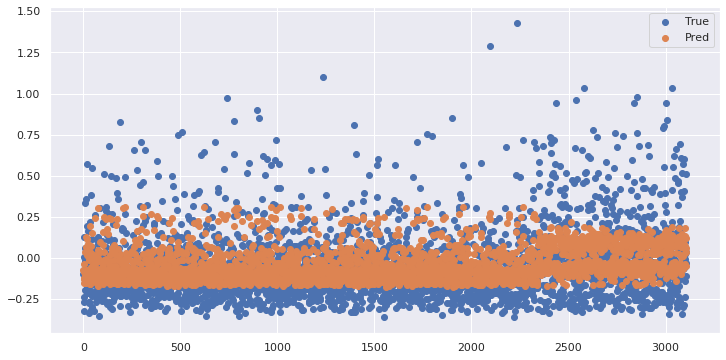

(0.2832060573175166, 0.17998384057139122)

In [490]:
test_evaluation(xgb, x_valid, y_valid) #0.73     500,15,0.3 (Standard scaler)
                                     #0.15     500,15,0.3 (robust scaler 1-99)

In [495]:
corr = train.corr()
corr.style.background_gradient()

# Submission

## XGB submission

Standard Scaling

In [337]:
pred_y = res_xgb.best_estimator_.predict(x_test)

s = StandardScaler().fit(train.target.values.reshape(-1,1))
y_pred = s.inverse_transform(pred_y.reshape(-1,1))

Robust Scaling

In [437]:
pred_y = res_xgb.best_estimator_.predict(x_test)

s = RobustScaler(quantile_range=(a,b)).fit(target.values.reshape(-1,1))
y_pred = s.inverse_transform(pred_y.reshape(-1,1))

## Random Forest Submission

Standard Scaling

In [308]:
pred_y = rf_grid.best_estimator_.predict(x_test)

s = StandardScaler().fit(target.values.reshape(-1,1))
y_pred = s.inverse_transform(pred_y.reshape(-1,1))

Robust Scaling

In [440]:
pred_y = rf_grid.best_estimator_.predict(x_test)

s = RobustScaler(quantile_range=(a,b)).fit(target.values.reshape(-1,1))
y_pred = s.inverse_transform(pred_y.reshape(-1,1))

## XGBoost submission

In [366]:
pred_y = bst.predict(dtest)

s = StandardScaler().fit(train.target.values.reshape(-1,1))
y_pred = s.inverse_transform(pred_y.reshape(-1,1))

In [474]:
pred_y = bst.predict(dtest)

s = RobustScaler(quantile_range=(a,b)).fit(train.target.values.reshape(-1,1))
y_pred = s.inverse_transform(pred_y.reshape(-1,1))

## Final Submission

In [486]:
sub = pd.read_csv('./sample_sub.csv')
sub.target = y_pred
sub

ID      target
0        ID_test_0   77.922646
1        ID_test_1  171.313156
2        ID_test_2  188.086441
3        ID_test_3  127.003998
4        ID_test_4   84.741447
...            ...         ...
5030  ID_test_5030   55.859848
5031  ID_test_5031   47.189701
5032  ID_test_5032   79.240417
5033  ID_test_5033   73.465134
5034  ID_test_5034   86.181557

[5035 rows x 2 columns]

In [487]:
sub.to_csv('submission_std_robust_xgb.csv', index=False)